<a href="https://colab.research.google.com/github/samkitkankariya/EDA---Play-Store-App-Review-Analysis/blob/main/EDA_Playstore_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Play Store App Review Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Problem Statement: Play Store App Analysis for Enhanced Engagement and Success**

The goal of this project is to analyze Play Store app data along with customer reviews to derive actionable insights that drive app engagement and success on the Android platform. The dataset comprises two main components:

1. **Play Store Apps Data**: This dataset includes information such as app category, ratings, reviews, size, installs, pricing, content rating, genres, and more.

2. **Customer Reviews Data**: The second dataset contains translated customer reviews of the Android apps, along with sentiment analysis metrics like sentiment polarity and subjectivity.

Explore and analyse the data to discover key factors responsible for app engagement and success.

#### **Define Your Business Objective?**

The business objective here is to gain actionable insights and make data-driven decisions to improve app performance and user satisfaction in the Google Play Store. This includes understanding user sentiments, analyzing app ratings, exploring category-wise trends, and identifying factors influencing app installs and reviews.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

Let's take a look at the data, which consists of two files:

- playstore data.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

- user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
data_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/EDA Playstore Review/Play Store Data.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/EDA Playstore Review/User Reviews.csv')

### Dataset First View

In [ ]:
# Dataset First Look
print("Playstore Data Set")
data_df

Playstore Data Set


App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [ ]:
print("User Reviews Dataset")
reviews_df.head(5)

User Reviews Dataset


App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Main Data : ", data_df.shape)
print("User Reviews: ", reviews_df.shape)

Main Data :  (10841, 13)
User Reviews:  (64295, 5)


### Dataset Information

In [ ]:
# Dataset Info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


By diagnosing the data frame, we know that:

- There are 13 columns of properties with 10841 rows of data.
- Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'
- Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
- Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.
- Values of column 'Price' are strings representing price with symbol '$'.
Hence, we will need to do some data cleaning.

**Change Data Type of Reviews, Size, Installs and Price from object to float**

In [ ]:
# 1) Convert 'Reviews' column to float

'''
    While converting 'Reviews' we get this error
    An Error occured: could not convert string to float: '3.0M'
'''

for index, review in enumerate(data_df['Reviews']):
    if 'M' in review:
        review = review.replace('M', '')
        review = float(review) * 1000000 # 1M = 1000000(million)
        data_df.at[index, 'Reviews'] = review # Update the DataFrame directly using .at

data_df['Reviews'] = data_df['Reviews'].astype(float)


In [ ]:
# 2)Clean 'Size' data & Convert 'Size' column to float

'''
    While converting 'Size' we get this error
    ValueError: could not convert string to float: '1,000+' -- for one record
    So remove it from dataframe
'''

index = data_df[data_df['Size'] == '1,000+'].index
data_df.drop(index=index, inplace=True)

sizes = [i for i in data_df['Size']]

def clean_sizes(sizes_list):
    """
    As sizes are represented in 'M' and 'k', we remove 'M'
    and convert 'k'/kilobytes into megabytes
    """
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size / 1024  # 1 megabyte = 1024 kilobytes
        # representing 'Varies with device' with value 0
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data

data_df['Size'] = clean_sizes(sizes)
data_df['Size'] = data_df['Size'].astype(float)


In [ ]:
# Convert 'Installs' column to float

'''
Normally we would use .str.replace('+','').str.replace(',','').astype(float)
But, Regular Expression makes it easier -
'\+' is a regex pattern that matches the '+' character, and ',' matches the ',' character.

'''

data_df['Installs'] = data_df['Installs'].replace({'\+': '', ',': ''}, regex = True).astype(float)


In [ ]:
# Convert 'Price' column to float
data_df['Price'] = data_df['Price'].str.replace('$', '').astype(float)

In [ ]:
# Let's check if we have got everything right
data_df.sample(10)

App            Category  \
6440                                    MEGA MAN MOBILE                GAME   
3509                                             Trello        PRODUCTIVITY   
11              Name Art Photo Editor - Focus n Filters      ART_AND_DESIGN   
5683                                      SMS Au revoir              FAMILY   
9001                                      DW Tech Tools            BUSINESS   
9753  Multi Surgery Hospital Pro: Virtual Doctor ER ...              FAMILY   
1401                         Health and Nutrition Guide  HEALTH_AND_FITNESS   
4747                                         Telegram X              SOCIAL   
5581  Sleep as Android: Sleep cycle tracker, smart a...           LIFESTYLE   
7776                     Stats CR Clan for Clash Royale              FAMILY   

      Rating   Reviews  Size    Installs  Type  Price Content Rating  \
6440     4.0     267.0  40.0     10000.0  Paid   1.99       Everyone   
3509     4.5   72513.0  12.0   5000000.0  Free   0.00       Everyone   
11       4.4    8788.0  12.0   1000000.0  Free   0.00       Everyone   
5683     NaN      17.0   1.7      5000.0  Free   0.00       Everyone   
9001     NaN       1.0   5.9       100.0  Free   0.00       Everyone   
9753     4.2      23.0  33.0      1000.0  Free   0.00           Teen   
1401     4.3    7895.0   3.3    500000.0  Free   0.00       Everyone   
4747     4.6   70449.0   0.0   5000000.0  Free   0.00           Teen   
5581     4.3  246201.0   0.0  10000000.0  Free   0.00       Everyone   
7776     3.8      16.0   9.9       100.0  Free   0.00       Everyone   

                Genres       Last Updated             Current Ver  \
6440            Action  February 17, 2017                 1.02.01   
3509      Productivity      July 18, 2018  5.0.1.11068-production   
11        Art & Design      July 31, 2018                  1.0.15   
5683     Entertainment   January 15, 2018                   2.0.0   
9001          Business      July 24, 2018                    26.1   
9753            Casual      April 3, 2018                     1.0   
1401  Health & Fitness      July 15, 2018                     3.3   
4747            Social      July 27, 2018      Varies with device   
5581         Lifestyle      July 23, 2018      Varies with device   
7776     Entertainment      July 25, 2018                   1.2.9   

             Android Ver  
6440          4.0 and up  
3509          5.0 and up  
11            4.0 and up  
5683          4.0 and up  
9001          4.1 and up  
9753          4.1 and up  
1401          4.0 and up  
4747  Varies with device  
5581  Varies with device  
7776          4.1 and up

In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
#Convert sentiment polarity to float
reviews_df['Sentiment_Polarity'] = reviews_df['Sentiment_Polarity'].astype(float)

#### Missing Values/Null Values

Sometimes missing data is represented by values like '?' or '-' which is then replaced by NaN values.

**NaN:**

NaN means Not a Number.
- One way to do it is by np.nan (from numpy) which is of floating type and is widely used for numerical computation.
- Another way is pd.NA (from pandas) which is of scalar value.

In [ ]:
# Missing Values/Null Values Count
print("Main Data: ")
nan_counts = data_df.isna().sum()
print(nan_counts[nan_counts > 0])

print("\nUser Reviews: ")
nan_counts = reviews_df.isna().sum()
print(nan_counts[nan_counts > 0])

Main Data: 
Rating         1474
Type              1
Current Ver       8
Android Ver       2
dtype: int64

User Reviews: 
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


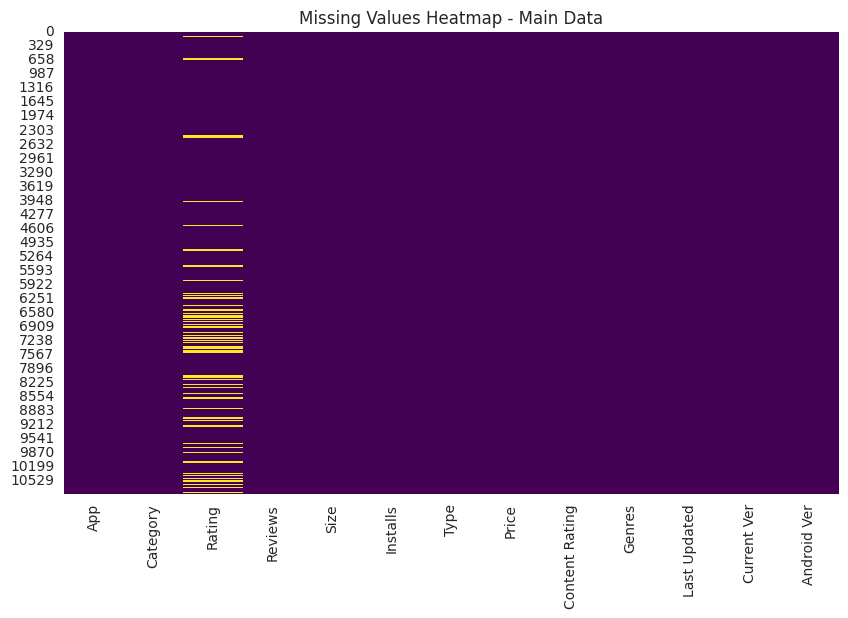

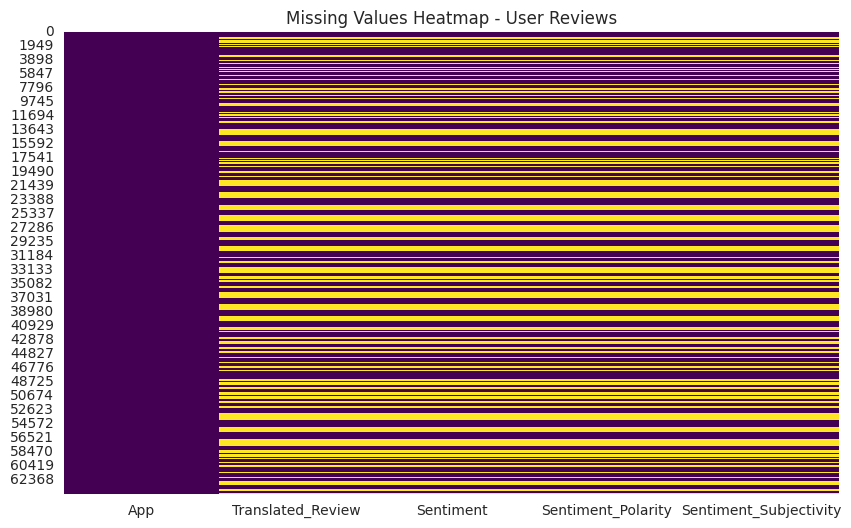

In [ ]:
# Visualizing the missing values

# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data_df.isnull(), cmap='viridis', cbar=False)
#cmap - color map, cbar - color bar
plt.title('Missing Values Heatmap - Main Data')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(reviews_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap - User Reviews')
plt.show()


#### Duplicate Values

In [ ]:
# Check for duplicate rows in data_df
duplicate_rows_data_df = data_df[data_df.duplicated()]

# Check for duplicate rows in reviews_df
duplicate_rows_reviews_df = reviews_df[reviews_df.duplicated()]

# Get the count of duplicate rows in each dataset
num_duplicates_data_df = len(duplicate_rows_data_df)
num_duplicates_reviews_df = len(duplicate_rows_reviews_df)

print(f"Number of duplicate rows in data_df: {num_duplicates_data_df}")
print(f"Number of duplicate rows in reviews_df: {num_duplicates_reviews_df}")


Number of duplicate rows in data_df: 483
Number of duplicate rows in reviews_df: 33616


In [ ]:
r = data_df[data_df['App'] == 'Facebook']
print(r)

           App Category  Rating     Reviews  Size      Installs  Type  Price  \
2544  Facebook   SOCIAL     4.1  78158306.0   0.0  1.000000e+09  Free    0.0   
3943  Facebook   SOCIAL     4.1  78128208.0   0.0  1.000000e+09  Free    0.0   

     Content Rating  Genres    Last Updated         Current Ver  \
2544           Teen  Social  August 3, 2018  Varies with device   
3943           Teen  Social  August 3, 2018  Varies with device   

             Android Ver  
2544  Varies with device  
3943  Varies with device  


### What did you know about your dataset?

- Main Dataset:

 This contains Play Store app reviews data, likely including information such as app names, reviews , categories, ratings, sizes , installation counts, app type, price, etc.

 This dataset can be analyzed to derive insights about app performance, user sentiments, popular categories, pricing strategies, and more.

- User-reviews dataset:

 The user reviews dataset contains information related to reviews for apps on the Play Store. It includes columns such as the app name, translated reviews, sentiment, sentiment polarity , and sentiment subjectivity.

 Analyzing this dataset can provide insights into user sentiments towards different apps, sentiment trends over time, factors influencing positive or negative reviews, and more.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Dataset Describe
data_df.describe()

Rating       Reviews          Size      Installs         Price
count  9366.000000  1.084000e+04  10840.000000  1.084000e+04  10840.000000
mean      4.191757  4.441529e+05     18.151783  1.546434e+07      1.027368
std       0.515219  2.927761e+06     22.170848  8.502936e+07     15.949703
min       1.000000  0.000000e+00      0.000000  0.000000e+00      0.000000
25%       4.000000  3.800000e+01      2.600000  1.000000e+03      0.000000
50%       4.300000  2.094000e+03      9.200000  1.000000e+05      0.000000
75%       4.500000  5.477550e+04     26.000000  5.000000e+06      0.000000
max       5.000000  7.815831e+07    100.000000  1.000000e+09    400.000000

### Variables Description


**Description of Main - Dataset Columns**

1. App: Name of the mobile application.
2. Category: Category or genre of the application.
3. Rating: Average user rating of the application (on a scale of 1 to 5).
4. Reviews: Number of user reviews/ratings received for the application.
5. Size: Size of the application (in terms of storage space).
6. Installs: Number of times the application has been installed/downloaded.
7. Type: Type of the application (e.g., Free or Paid).
8. Price: Price of the application (if it's a paid app).
9. Content Rating: Content rating or maturity level of the application (e.g., Everyone, Teen, etc.).
10. Genres: Specific genres or sub-categories of the application.
11. Last Updated: Date when the application was last updated.
12. Current Ver: Current version of the application.
13. Android Ver: Minimum required Android version for the application to run.


**Description of User Reviews - Dataset Columns**

1. App: Name of the mobile application.
2. Translated_Review: Translated version of the user review for the application.
3. Sentiment: Sentiment analysis result of the review (e.g., Positive, Negative, Neutral).
4. Sentiment_Polarity: Numerical value indicating the sentiment polarity of the review.
5. Sentiment_Subjectivity: Numerical value indicating the subjectivity of the review (how subjective or objective it is).



### Check Unique Values for each variable.

In [ ]:
exclude_columns = ['App', 'Reviews', 'Rating', 'Size', 'Price', 'Installs']

# Loop through columns in the DataFrame
for column in data_df.columns:
    # Skip excluded columns
    if column not in exclude_columns:
        # Get unique values
        unique_values = data_df[column].unique()
        print(f"Unique values for '{column}': {unique_values}\n\n")


Unique values for 'Category': ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Unique values for 'Type': ['Free' 'Paid' nan]


Unique values for 'Content Rating': ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


Unique values for 'Genres': ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;Action & Adventure' 'Auto & Vehicles' 'Beauty'
 'Books & Reference' 'Business' 'Comics' 'Comics;Creativity'
 'Communication' 'Dating' 'Education;Education' 'Education'
 'Education;Creativity' 'Education;Music & Video'
 'Educati

In [ ]:
exclude_columns = ['App', 'Translated_Review']

# Loop through columns in the DataFrame
for column in reviews_df.columns:
    # Skip excluded columns
    if column not in exclude_columns:
        # Get unique values for each column and print
        unique_values = reviews_df[column].unique()
        print(f"Unique values for '{column}': {unique_values}\n\n")


Unique values for 'Sentiment': ['Positive' nan 'Neutral' 'Negative']


Unique values for 'Sentiment_Polarity': [ 1.          0.25               nan ... -0.52857143 -0.37777778
  0.17333333]


Unique values for 'Sentiment_Subjectivity': [0.53333333 0.28846154        nan ... 0.51145833 0.7172619  0.2594697 ]




## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

**Handling Missing Values**

- The Rating column contains 1470 NaN values in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.

- The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.

In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(data_df['Rating'].mean(),3)
median_rating = data_df['Rating'].median()
[mean_rating, median_rating]

[4.192, 4.3]

**Visualization of distribution of rating using displot and detecting the outliers through boxplot.**


<Axes: xlabel='Rating'>

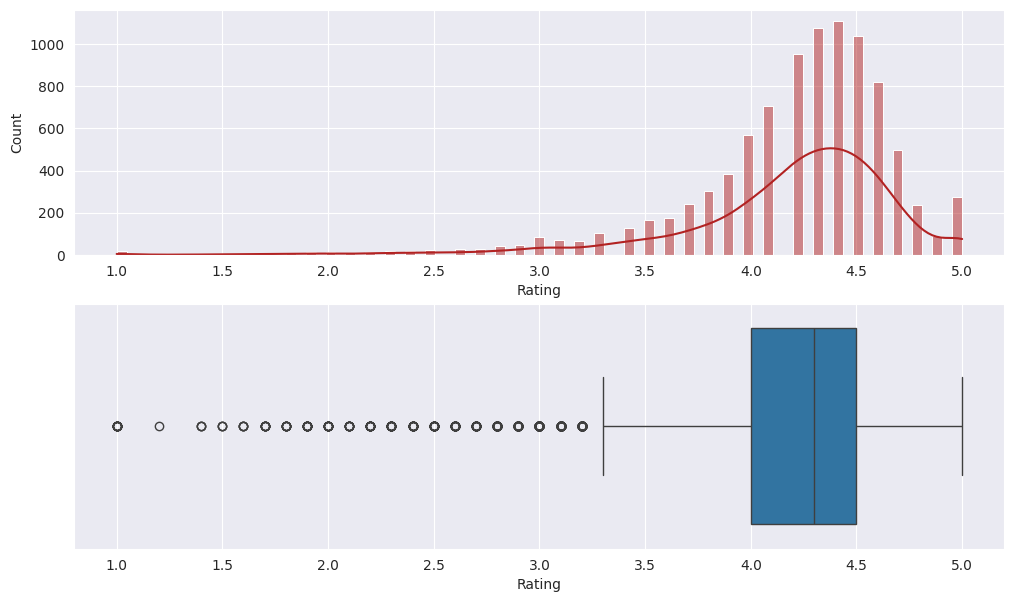

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.histplot(data=data_df, x = 'Rating', color = 'firebrick', kde=True, ax=ax[0])
sns.boxplot(x='Rating', data=data_df, ax=ax[1])


* The mean of the average ratings (excluding the NaN values) comes to be 4.2.

* The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.
* From the distplot visualizations, it is clear that the ratings are left skewed.
* We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
* Hence we will impute the NaN values in the Rating column with its median.

In [ ]:
# Replace missing values with the median
data_df['Rating'].fillna(median_rating, inplace=True)


In [ ]:
#One Type value is null so remove it

data_df.dropna(subset = 'Type', axis = 0, inplace = True)

Since the NaN values in the Current Ver & Android Ver column cannot be replaced by any particular value, and, since there are only 8 and 2 rows respectively which contain NaN values in this column it can be be dropped.

In [ ]:
data_df.dropna(subset = ['Current Ver', 'Android Ver'], axis = 0, inplace = True)

In [ ]:
#In User Reviews data we drop the rows which dont have any reviews
reviews_df.dropna(subset = 'Translated_Review', axis = 0, inplace = True)

In [ ]:
#Check for null values
# Missing Values/Null Values Count
print("Main Data: ")
nan_counts = data_df.isna().sum()
print(nan_counts[nan_counts > 0])

print("\nUser Reviews: ")
nan_counts = reviews_df.isna().sum()
print(nan_counts[nan_counts > 0])

Main Data: 
Series([], dtype: int64)

User Reviews: 
Series([], dtype: int64)


 **Removing Duplicates**

In [ ]:
data_df.shape

(10829, 13)

In [ ]:
data_df['App'].value_counts()

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9648, dtype: int64

In [ ]:
# Inspecting the duplicates values.
data_df[data_df['App']=='ROBLOX']

App Category  Rating    Reviews  Size     Installs  Type  Price  \
1653  ROBLOX     GAME     4.5  4447388.0  67.0  100000000.0  Free    0.0   
1701  ROBLOX     GAME     4.5  4447346.0  67.0  100000000.0  Free    0.0   
1748  ROBLOX     GAME     4.5  4448791.0  67.0  100000000.0  Free    0.0   
1841  ROBLOX     GAME     4.5  4449882.0  67.0  100000000.0  Free    0.0   
1870  ROBLOX     GAME     4.5  4449910.0  67.0  100000000.0  Free    0.0   
2016  ROBLOX   FAMILY     4.5  4449910.0  67.0  100000000.0  Free    0.0   
2088  ROBLOX   FAMILY     4.5  4450855.0  67.0  100000000.0  Free    0.0   
2206  ROBLOX   FAMILY     4.5  4450890.0  67.0  100000000.0  Free    0.0   
4527  ROBLOX   FAMILY     4.5  4443407.0  67.0  100000000.0  Free    0.0   

     Content Rating                        Genres   Last Updated  \
1653   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1701   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1748   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1841   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
1870   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2016   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2088   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
2206   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   
4527   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   

       Current Ver Android Ver  
1653  2.347.225742  4.1 and up  
1701  2.347.225742  4.1 and up  
1748  2.347.225742  4.1 and up  
1841  2.347.225742  4.1 and up  
1870  2.347.225742  4.1 and up  
2016  2.347.225742  4.1 and up  
2088  2.347.225742  4.1 and up  
2206  2.347.225742  4.1 and up  
4527  2.347.225742  4.1 and up

In [ ]:
# dropping duplicates from the 'App' column.
data_df.drop_duplicates(subset = 'App', inplace = True)
data_df.shape

(9648, 13)

In [ ]:
# Checking whether the duplicates in the 'App' column are taken care of or not
data_df[data_df['App']=='ROBLOX']

App Category  Rating    Reviews  Size     Installs  Type  Price  \
1653  ROBLOX     GAME     4.5  4447388.0  67.0  100000000.0  Free    0.0   

     Content Rating                        Genres   Last Updated  \
1653   Everyone 10+  Adventure;Action & Adventure  July 31, 2018   

       Current Ver Android Ver  
1653  2.347.225742  4.1 and up

In [ ]:
# sort the dataframe by Reviews descendingly
data_df.sort_values(by = 'Reviews', ascending=False, inplace=True)
data_df

App        Category  Rating  \
2544                                  Facebook          SOCIAL     4.1   
336                         WhatsApp Messenger   COMMUNICATION     4.4   
2545                                 Instagram          SOCIAL     4.5   
335   Messenger – Text and Video Chat for Free   COMMUNICATION     4.0   
1670                            Clash of Clans            GAME     4.6   
...                                        ...             ...     ...   
8871                    Test Application DT 02  ART_AND_DESIGN     4.3   
5134                               Woodland AH         MEDICAL     4.3   
9252                                     EC QR    PRODUCTIVITY     4.3   
8068                     Hyundai CX Conference   COMMUNICATION     4.3   
5111                         Ag Across America          FAMILY     4.3   

         Reviews  Size      Installs  Type  Price Content Rating  \
2544  78158306.0   0.0  1.000000e+09  Free    0.0           Teen   
336   69119316.0   0.0  1.000000e+09  Free    0.0       Everyone   
2545  66577313.0   0.0  1.000000e+09  Free    0.0           Teen   
335   56642847.0   0.0  1.000000e+09  Free    0.0       Everyone   
1670  44891723.0  98.0  1.000000e+08  Free    0.0   Everyone 10+   
...          ...   ...           ...   ...    ...            ...   
8871         0.0   1.2  0.000000e+00  Free    0.0       Everyone   
5134         0.0   0.0  5.000000e+01  Free    0.0       Everyone   
9252         0.0   4.0  1.000000e+01  Free    0.0       Everyone   
8068         0.0  20.0  5.000000e+01  Free    0.0       Everyone   
5111         0.0  15.0  1.000000e+01  Free    0.0       Everyone   

                     Genres      Last Updated         Current Ver  \
2544                 Social    August 3, 2018  Varies with device   
336           Communication    August 3, 2018  Varies with device   
2545                 Social     July 31, 2018  Varies with device   
335           Communication    August 1, 2018  Varies with device   
1670               Strategy     July 15, 2018           10.322.16   
...                     ...               ...                 ...   
8871           Art & Design    March 14, 2017                 4.0   
5134                Medical  February 2, 2018         300000.0.97   
9252           Productivity     July 24, 2018               1.0.2   
8068          Communication      May 27, 2018              2.10.2   
5111  Educational;Education      May 15, 2018               1.0.0   

             Android Ver  
2544  Varies with device  
336   Varies with device  
2545  Varies with device  
335   Varies with device  
1670          4.1 and up  
...                  ...  
8871          4.2 and up  
5134        4.0.3 and up  
9252          4.1 and up  
8068          4.2 and up  
5111          4.1 and up  

[9648 rows x 13 columns]

In [ ]:
#Handling duplicates of User Reviews Dataset


# Print the shape of the cleaned dataset before and after removing duplicates
print("Shape of reviews_df before removing duplicates:", reviews_df.shape)

# Check for duplicate rows in reviews_df
duplicate_rows_reviews_df = reviews_df[reviews_df.duplicated()]
num_duplicates_reviews_df = len(duplicate_rows_reviews_df)
print(f"Number of duplicate rows in reviews_df: {num_duplicates_reviews_df}")

# Remove duplicate rows from reviews_df based on all columns
reviews_df = reviews_df.drop_duplicates()

print("Shape of cleaned_reviews_df after removing duplicates:", reviews_df.shape)



Shape of reviews_df before removing duplicates: (37427, 5)
Number of duplicate rows in reviews_df: 7735
Shape of cleaned_reviews_df after removing duplicates: (29692, 5)


### What all manipulations have you done and insights you found?




1. **Handling Missing Values**:
   - Filled missing values in the 'Rating' column with the median value.
   - Removed rows with missing values in the 'Type' column from 'data_df'.
   - Removed rows with missing values in the 'Translated_Review' column from `reviews_df`.

2. **Removing Duplicates**:
   - Grouped `data_df` by various columns and calculated the mean of 'Installs'.
   - Sorted `data_df` by 'Reviews' in descending order and dropped duplicate rows based on the 'App' column.
   - Removed duplicate rows from `reviews_df` based on all columns.

3. **Insights**:
   - The median value was used to fill missing values in the 'Rating' column, ensuring no data loss in an important variable.
   - Removing rows with missing 'Type' values in `data_df` ensures data integrity and completeness.
   - The cleaning process in `reviews_df` removes redundant data, ensuring each review entry is unique.
   - After cleaning, the datasets are ready for analysis without missing values or duplicate entries, providing accurate insights.

These manipulations and insights contribute to data quality and prepare the datasets for meaningful analysis, ensuring reliable results and actionable conclusions.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


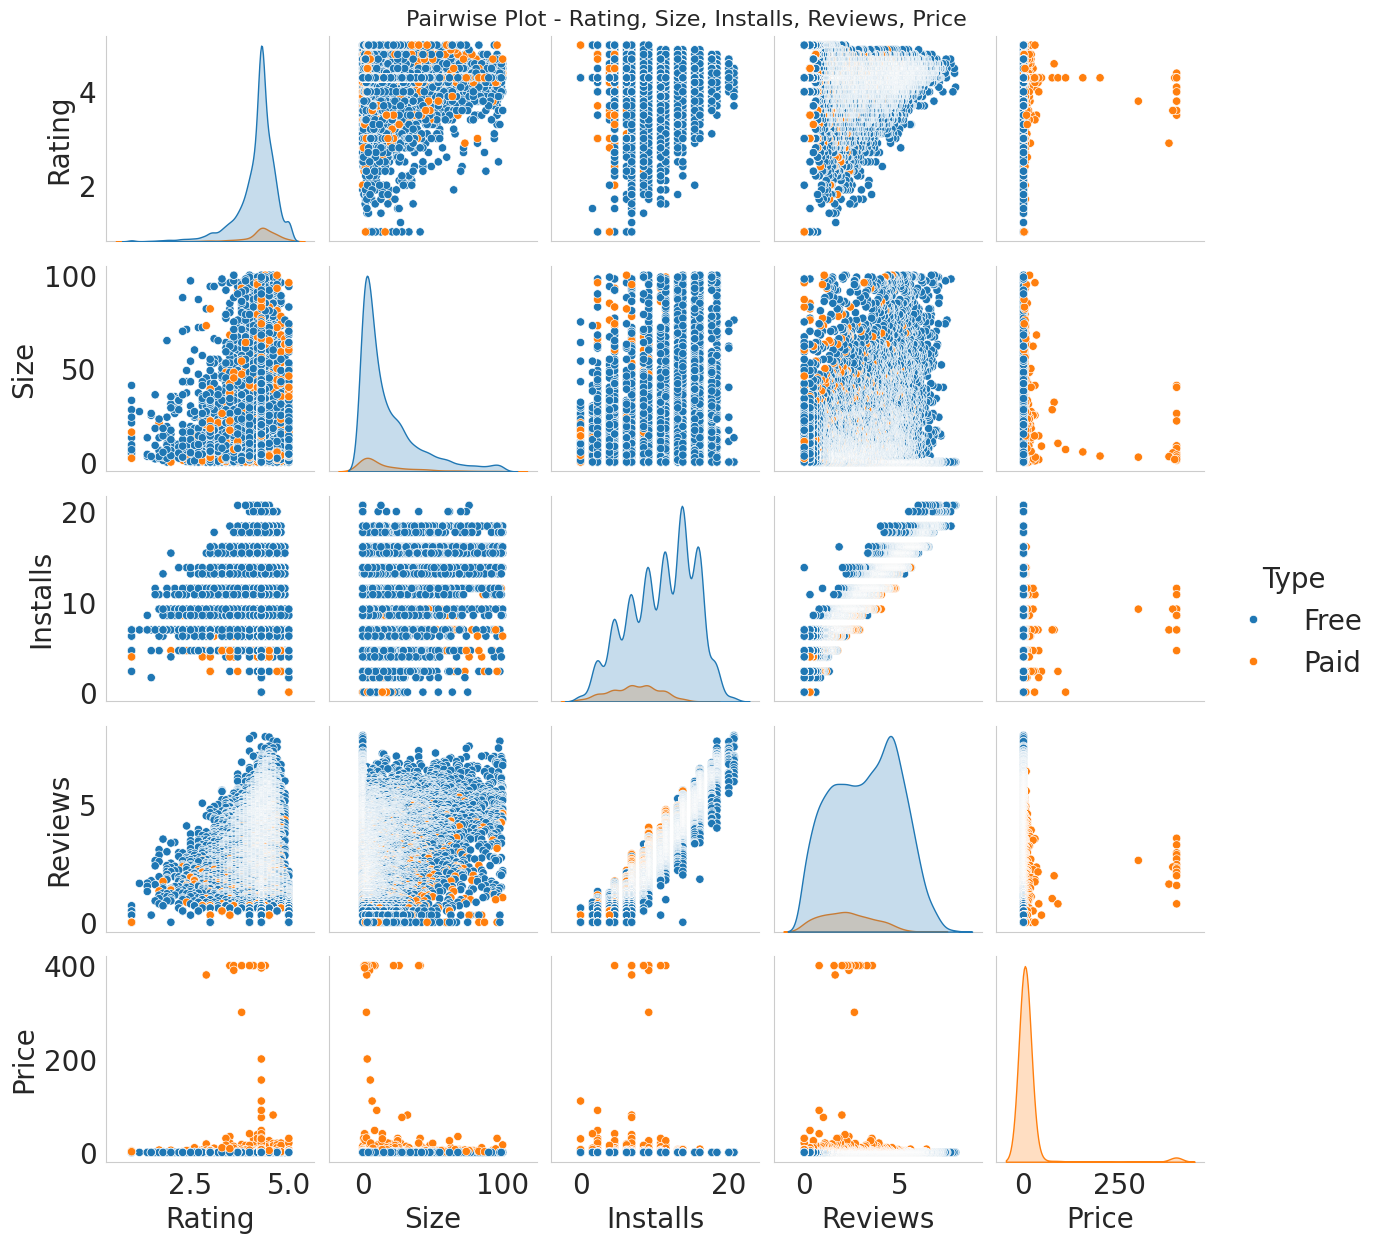

In [ ]:
# Extract relevant columns from data_df
Rating = data_df['Rating']
Size = data_df['Size']
Installs = data_df['Installs']
Reviews = data_df['Reviews']
Type = data_df['Type']
Price = data_df['Price']

# Create a DataFrame with selected columns and perform logarithmic transformation on Installs and Reviews
pairwise_df = pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)),
                           columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type'])

# Create a pairplot with hue based on 'Type' column
p = sns.pairplot(pairwise_df, hue='Type')

# Set title for the pairplot
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price", x=0.5, y=1.0, fontsize=16)

# Show the pairplot
plt.show()


**FINDINGS**
* Most of the App are Free.
* Most of the Paid Apps have Rating around 4
* As the number of installation increases the number of reviews of the particaular app also increases.
*Most of the Apps are light-weighted.

#### Chart - 1 = Number of Apps per Category

Bar Chart of App Categories vs Number of Installs:

This chart shows the number of installations for each app category, helping to identify which categories are most popular among users.

<ipython-input-406-03631af2d8b7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=data_df, order=app_count_per_category.index, palette="tab10")


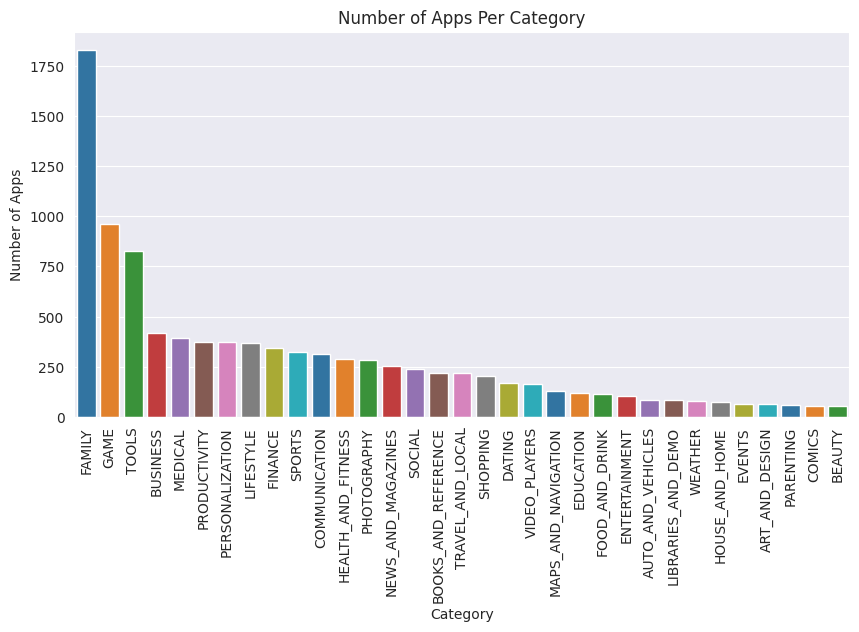

In [ ]:
# get the number of apps for each category

# Calculate the number of apps for each category
app_count_per_category = data_df['Category'].value_counts().sort_values(ascending=False)

# Set the style for the plot
sns.set_style('darkgrid')

# Create a figure and set its size
plt.figure(figsize=(10, 5))

# Use a count plot to visualize the number of apps per category
sns.countplot(x='Category', data=data_df, order=app_count_per_category.index, palette="tab10")

# Set the title and labels for the plot
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a count plot because it effectively shows the frequency of apps within each category, providing a clear overview of app distribution across different categories.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that out of 33 categories 'Family', 'Game', and 'Tools' have the highest number of apps, indicating that these categories are popular among app developers and users.

Least number of apps are from EVENTS & BEAUTY Category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be valuable for business planning and strategy. Knowing that 'Family', 'Game', and 'Tools' are popular categories, businesses can focus their development efforts on these categories to target a larger user base. However, there are no insights in this chart that directly suggest negative growth.

#### Chart - 2 = Number of Installs per App Category

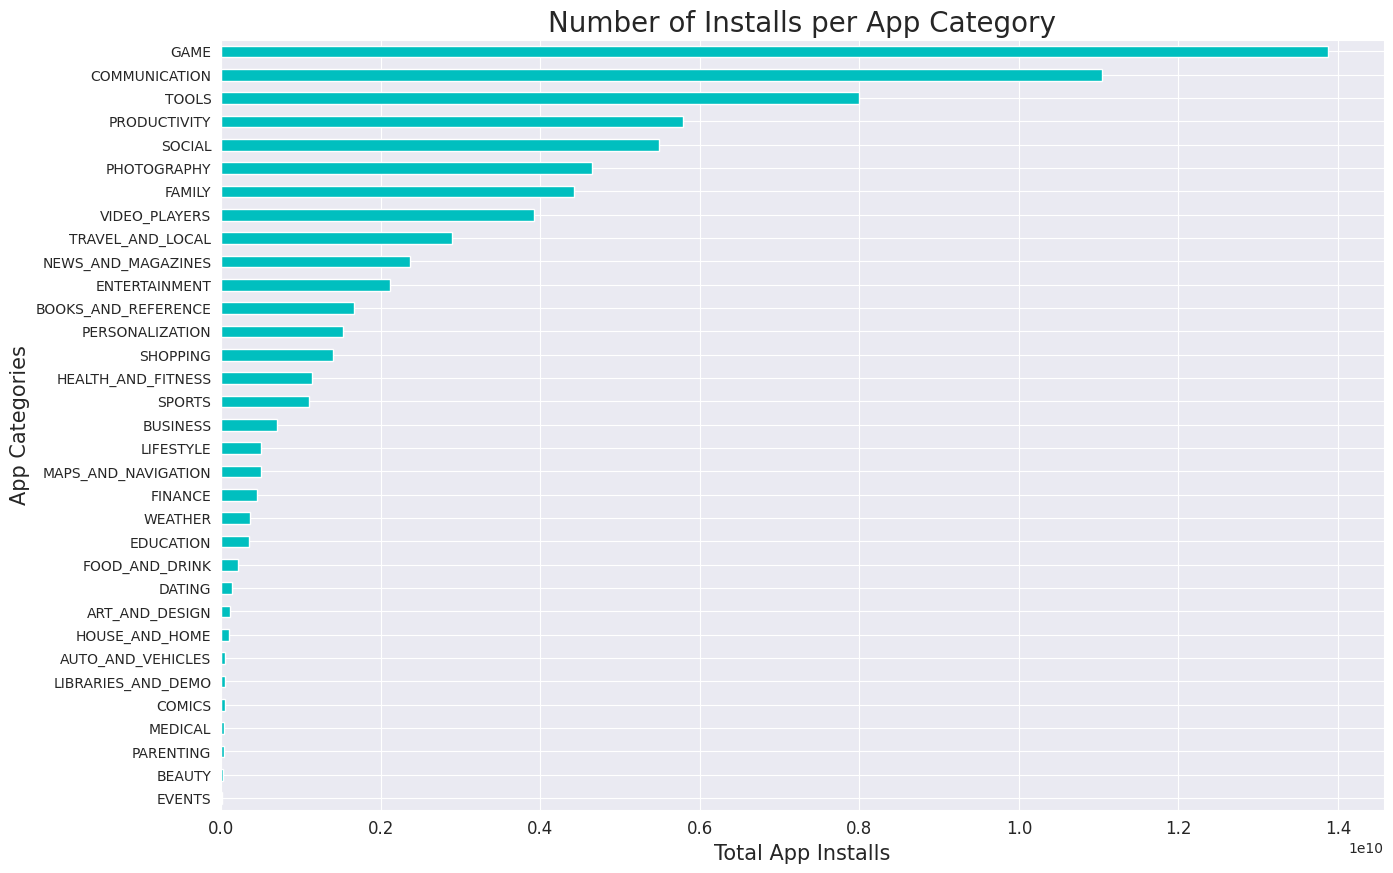

In [ ]:
# Calculate the total app installs in each category of the play store
installs_by_category = data_df.groupby(['Category'])['Installs'].sum().sort_values()

# Create a horizontal bar plot to visualize the number of installs per app category
installs_by_category.plot.barh(figsize=(15, 10), color='c')

# Set labels and title for the plot
plt.xlabel('Total App Installs', fontsize=15)
plt.ylabel('App Categories', fontsize=15)
plt.xticks(fontsize=12)
plt.title('Number of Installs per App Category', fontsize=20)

# Show the plot
plt.show()


The code category_installs.plot(kind='bar') creates a bar chart based on the data in the category_installs Series.

##### 1. Why did you pick the specific chart?

I chose a bar chart because it effectively displays the comparison of total installs across different app categories. This visualization is suitable for showcasing the magnitude of installs for each category.

##### 2. What is/are the insight(s) found from the chart?

From this distribution plotting of number of installs for each category, we can see that most of the apps being downloaded and installed are from the categories of 'Game' and 'Communication'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be highly beneficial for businesses in the app industry. Knowing that 'Game' and 'Communication' categories have the highest installs, businesses can focus on developing and promoting apps in these categories to attract more users and potentially increase revenue.

#### Chart - 3 = Rating Distribution

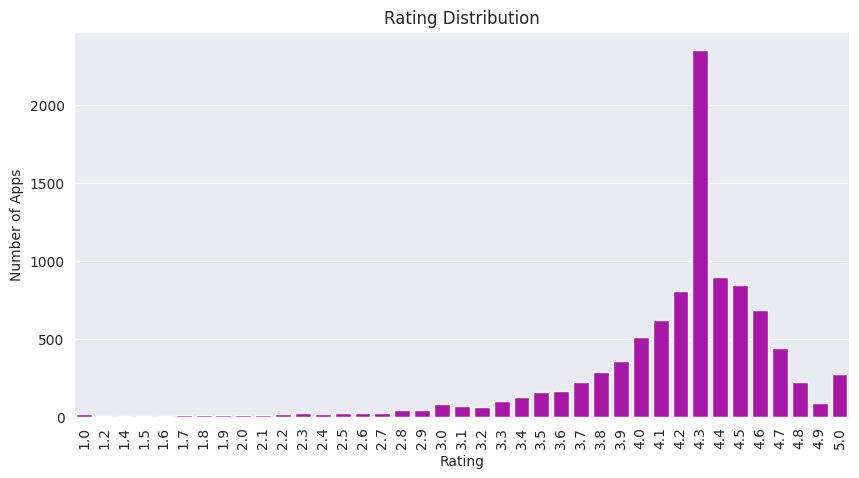

In [ ]:
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=data_df, color = 'm')
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot because it's suitable for visualizing the distribution of a categorical variable like 'Rating'. It helps to understand how many apps fall into each rating category.

##### 2. What is/are the insight(s) found from the chart?

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insight that many apps have high ratings suggests that users are satisfied with a substantial portion of the apps available. This positive sentiment can contribute to a positive business impact by encouraging more downloads, better user reviews, and potentially increased revenue from app purchases or advertisements. However, it's essential to further analyze other factors like user reviews, app functionality, and competition to make informed business decisions.

#### Chart - 4 = Rating Groups

We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:

* 4-5: Top rated
* 3-4: Above average
* 2-3: Average
* 1-2: Below average

**Lets create a new column 'Rating group' in the main dataframe and apply these filters.**

In [ ]:
# Defining a function grouped_rating to group the ratings as mentioned above
def Rating_app(val):
  ''''
  This function help to categories the rating from 1 to 5
  as Top_rated,Above_average,Average & below Average
  '''
  if val>=4:
    return 'Top rated'
  elif val>3 and val<4:
    return 'Above Average'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Below Average'


Lets apply the grouped_rating function on the Rating column and save the output in new column named as Rating group in the main df.

In [ ]:
# Applying grouped_rating function
data_df['Rating_group']=data_df['Rating'].apply(lambda x: Rating_app(x))

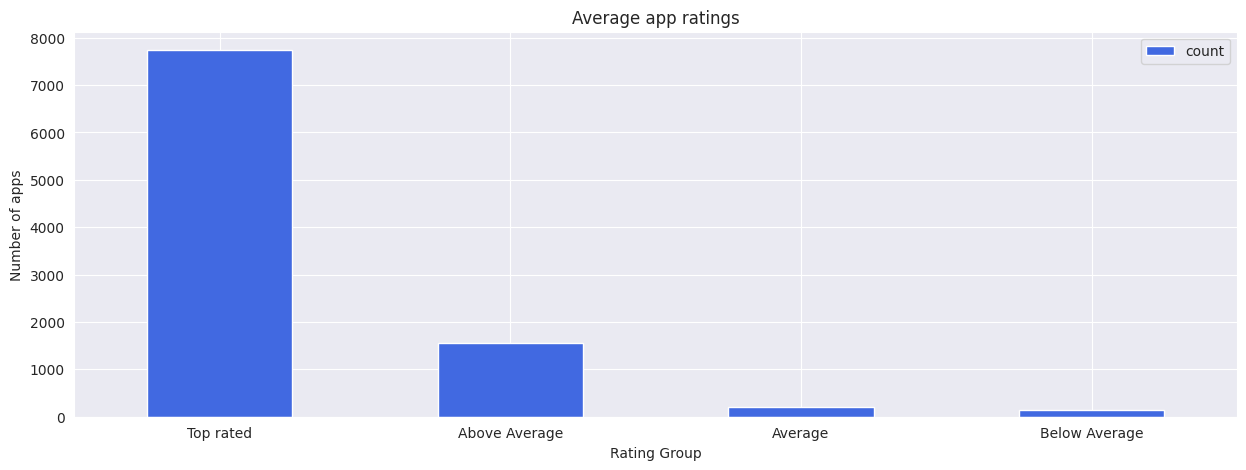

In [ ]:
# Average app ratings
data_df['Rating_group'].value_counts().plot.bar(figsize=(15,5), color = 'royalblue')
plt.xlabel('Rating Group')
plt.ylabel('Number of apps')
plt.title('Average app ratings')
plt.xticks(rotation=0)
plt.legend()

##### 1. Why did you pick the specific chart?

The specific chart, a bar plot, is chosen to visualize the distribution of app ratings across different rating groups, providing a clear comparison of the number of apps falling into each rating category.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that a significant number(7000+) of apps fall into the 'Top rated' category, indicating a considerable proportion of highly-rated apps in the dataset. The distribution across other categories ('Above Average'(2000), 'Average', 'Below Average') provides insights into the overall quality and diversity of app ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help businesses understand the distribution of app ratings and identify areas of strength (Top rated apps) as well as areas for potential improvement (Average and Below Average apps).

#### Chart - 5 = Reviews, Size, Installs, Price vs Rating

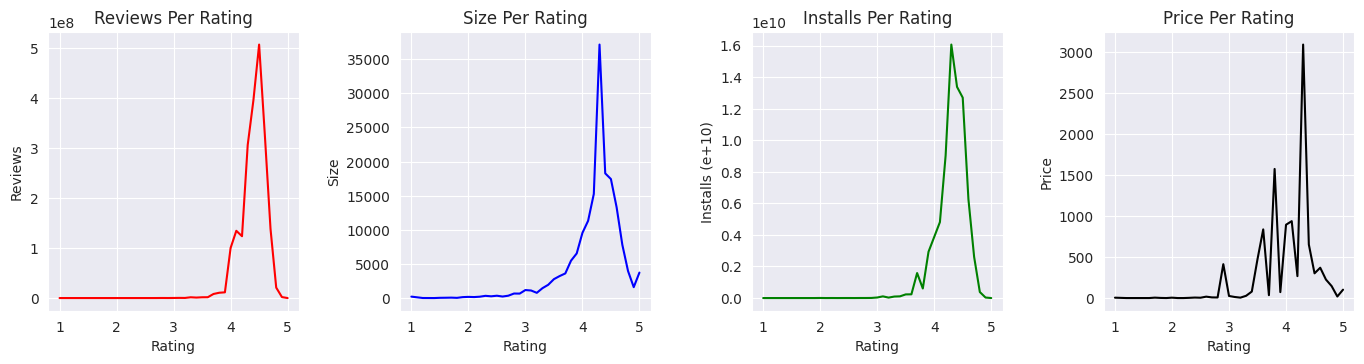

In [ ]:
# Group the data by 'Rating' and calculate the sum for each rating
rating_df = data_df.groupby('Rating').sum().reset_index()

# Create a figure with 1 row and 4 columns for the subplots
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

# Plot the Reviews vs Rating graph on the first subplot
axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r') # 'r' - red color
axes[0].set_xlabel('Rating')  # Set the x-axis label
axes[0].set_ylabel('Reviews')  # Set the y-axis label
axes[0].set_title('Reviews Per Rating')  # Set the title for the subplot

# Plot the Size vs Rating graph on the second subplot
axes[1].plot(rating_df['Rating'], rating_df['Size'], 'b')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

# Plot the Installs vs Rating graph on the third subplot
axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')  # The label indicates it's in the form of 10^10
axes[2].set_title('Installs Per Rating')


# Plot the Price vs Rating graph on the fourth subplot
axes[3].plot(rating_df['Rating'], rating_df['Price'], 'k') #'k' - black color
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

# Adjust the spacing between subplots for better readability
plt.tight_layout(pad=2)
plt.show()  # Display the plot


##### 1. Why did you pick the specific chart?

I chose to plot graphs of Reviews, Size, Installs, and Price per Rating because it helps to understand how these variables relate to app ratings. It allows for a visual comparison of how each metric changes concerning different rating levels.

##### 2. What is/are the insight(s) found from the chart?

- Reviews: Higher-rated apps tend to have a higher number of reviews, indicating more user engagement and possibly higher satisfaction levels.
- Size: The size of apps doesn't show a clear trend with rating, suggesting that users may not prioritize app size when rating them.
- Installs: Apps with higher ratings generally have a larger number of installs, reflecting user preferences for well-rated apps.
- Price: There isn't a direct correlation between price and rating, as apps with varying prices exist across different rating ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help developers and businesses understand the relationship between app ratings and key metrics.

- Focusing on improving ratings can lead to higher user engagement and more installs.
- Understanding that app size may not heavily influence ratings can guide decisions on optimizing app size without compromising functionality.
- Analyzing pricing strategies in relation to ratings can inform decisions on pricing tiers and potential revenue generation.

#### Chart - 6 = Exploring App Ratings by Size and Category

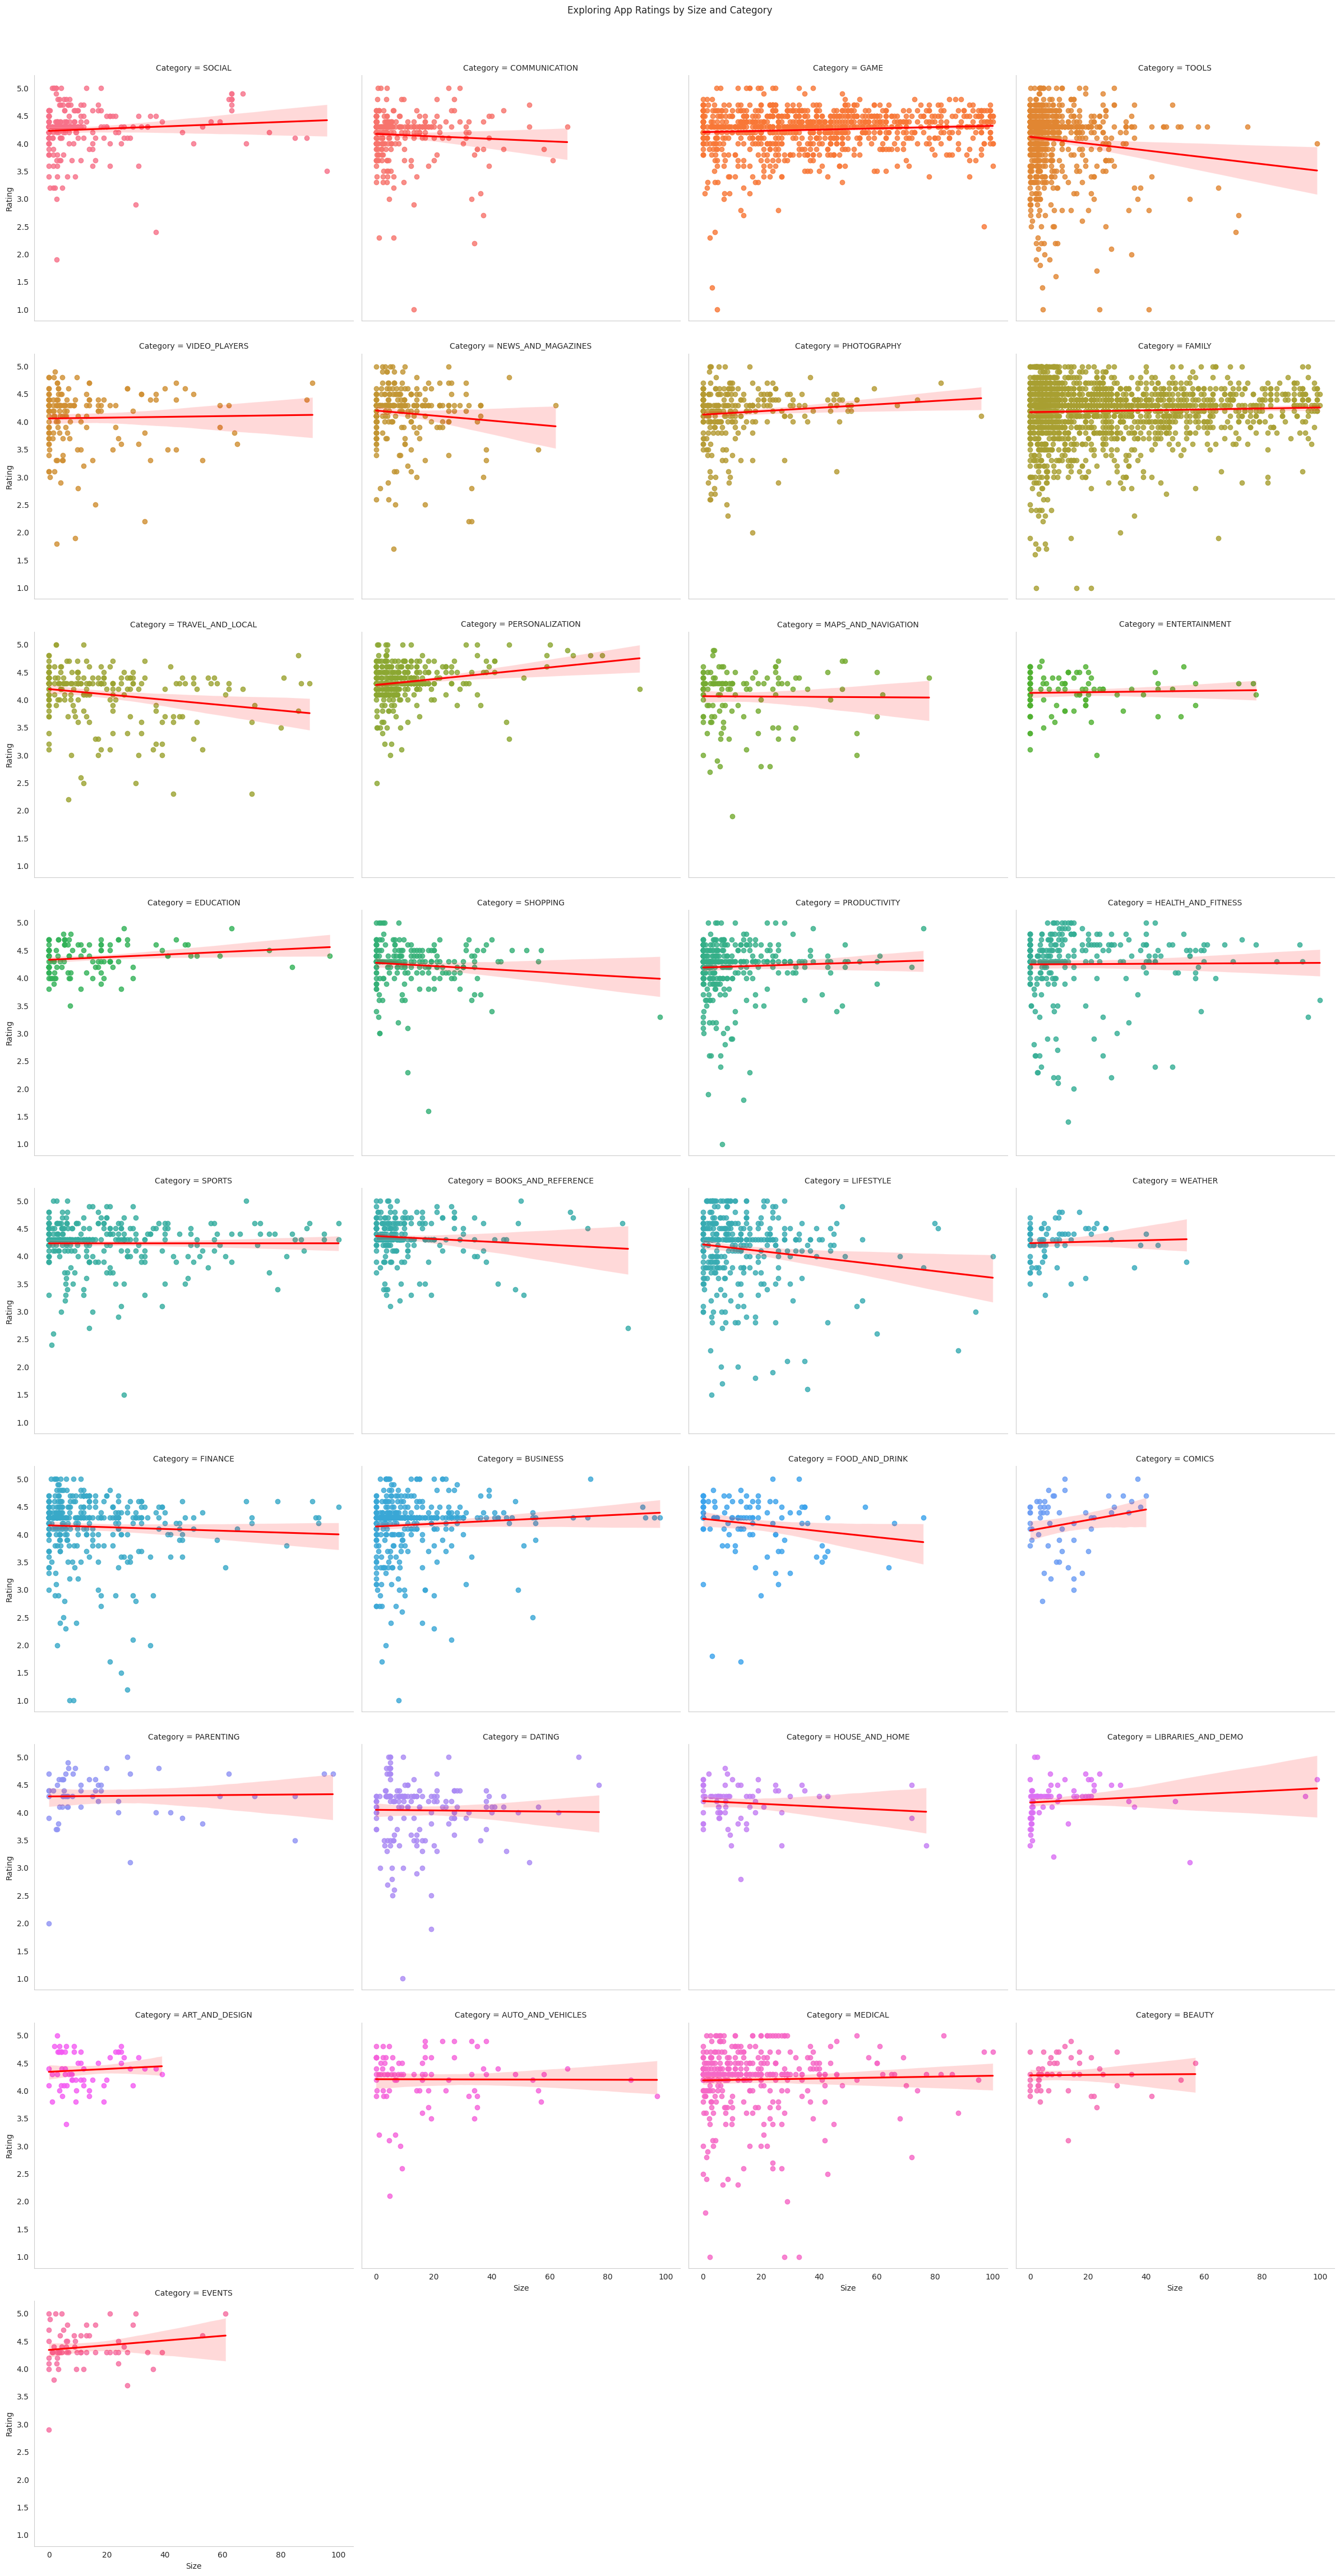

In [ ]:
# Set the seaborn style to whitegrid and remove the grid from axes
sns.set_style("whitegrid", {'axes.grid' : False})

# Create an lmplot to visualize the relationship between Rating and Size across different categories
sns.lmplot(y='Rating', x='Size', data=data_df, col="Category", hue="Category", col_wrap=4,
           line_kws={'color': 'red'}, height=5, aspect=1.2)
plt.suptitle('Exploring App Ratings by Size and Category', y=1.02)

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

 This lmplot visualizes how the Rating of apps varies with their Size, segmented by different app categories.

 The red regression line shows the overall trend, while each subplot represents a specific app category, allowing for category-specific insights.


##### 2. What is/are the insight(s) found from the chart?

The chart reveals varying trends in the relationship between app size and ratings across different app categories. For instance, in some categories, larger apps may have higher ratings, while in others, smaller apps might be favored by users. This insight can guide decisions on app development and marketing strategies tailored to each category's user preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights derived from this chart can have a positive business impact by informing decisions related to app design, functionality, and marketing. By understanding how app size influences user ratings within specific categories, businesses can optimize their apps to better meet user expectations, leading to improved user satisfaction and potentially higher app ratings, which in turn can drive downloads, user retention, and overall business success.

#### Chart - 7 = Distribution of Paid and Free Apps

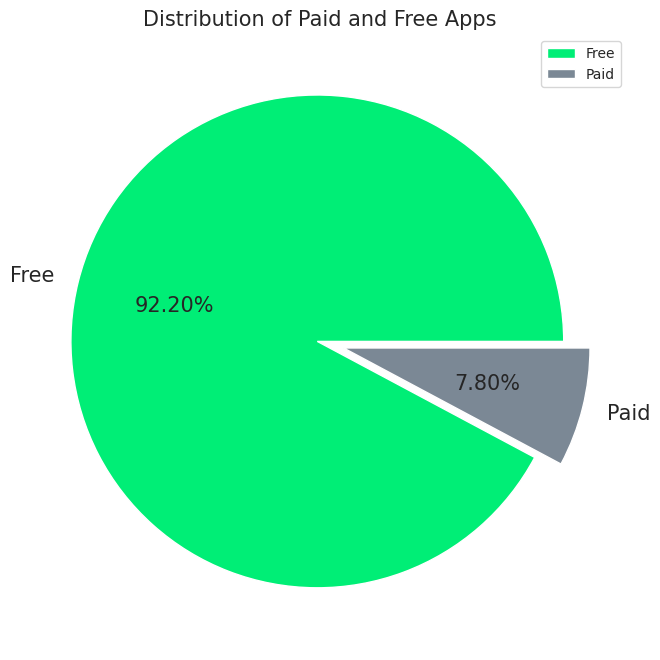

In [ ]:
# Calculate the distribution of app types (Free vs. Paid)
data = data_df['Type'].value_counts()

# Labels for the pie chart
labels = ['Free', 'Paid']

# Create a pie chart
plt.figure(figsize=(8,8))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%', explode=explode, textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free Apps', size=15, loc='center')
plt.legend()

# Show the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart is effective for displaying the distribution of categorical data, such as the proportion of Free and Paid apps, in a visually appealing manner.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that Free apps make up a significant majority (92.2%) of the dataset, while Paid apps constitute a smaller portion (7.8%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that most apps are free can help businesses understand the prevailing market trend towards free apps. For developers planning monetization strategies, this insight suggests that offering free apps with in-app purchases or ads might align better with user expectations.
- Negative Trend -
However, if a business model heavily relies on paid apps, this insight could indicate a challenging market landscape in terms of competition and user preferences for free offerings.

#### Chart - 8 = Top Apps of Paid Type

In [ ]:
# Creating a df containing only paid apps
paid_df=data_df[data_df['Type']=='Paid']

<Axes: xlabel='Price'>

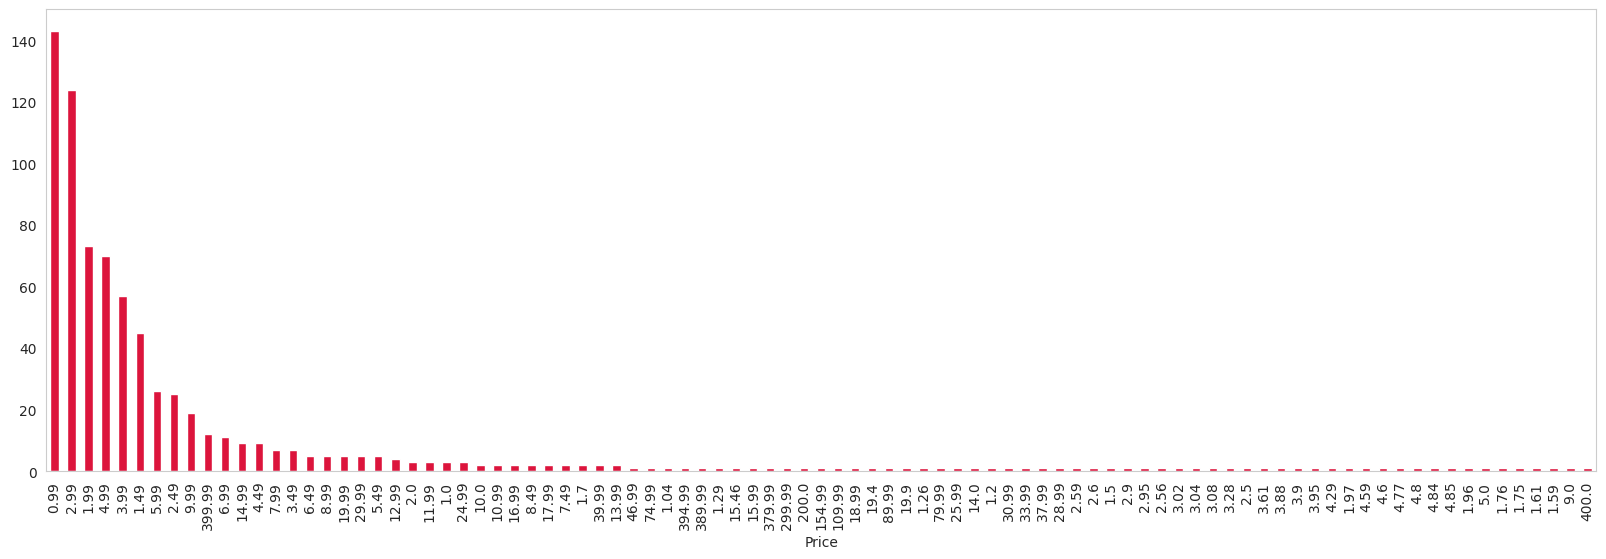

In [ ]:
# Number of apps that can be installed at a particular price

paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

* The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
* There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.
* In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.
* Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
* This is given by:

 Revenue generated through installs = (Number of installs)x(Price to install the app)


**Lets define a new column Revenue in paid_df which gives the revenue generated by the app through installs alone.**

In [ ]:
# Creatng a new column 'Revenue' in paid_df
paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

<ipython-input-417-83cf897b5afd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']


App Category  Rating    Reviews  Size  \
2241                      Minecraft   FAMILY     4.5  2376564.0   0.0   
4034                  Hitman Sniper     GAME     4.6   408292.0  29.0   
7417  Grand Theft Auto: San Andreas     GAME     4.4   348962.0  26.0   
8860                    Bloons TD 5   FAMILY     4.6   190086.0  94.0   
9678              Where's My Water?   FAMILY     4.7   188740.0  69.0   

        Installs  Type  Price Content Rating                     Genres  \
2241  10000000.0  Paid   6.99   Everyone 10+  Arcade;Action & Adventure   
4034  10000000.0  Paid   0.99     Mature 17+                     Action   
7417   1000000.0  Paid   6.99     Mature 17+                     Action   
8860   1000000.0  Paid   2.99       Everyone                   Strategy   
9678   1000000.0  Paid   1.99       Everyone         Puzzle;Brain Games   

        Last Updated Current Ver         Android Ver Rating_group     Revenue  
2241   July 24, 2018     1.5.2.1  Varies with device    Top rated  69900000.0  
4034   July 12, 2018  1.7.110758          4.1 and up    Top rated   9900000.0  
7417  March 21, 2015        1.08          3.0 and up    Top rated   6990000.0  
8860   July 13, 2018        3.16        2.3.3 and up    Top rated   2990000.0  
9678    July 5, 2018      1.16.0          4.2 and up    Top rated   1990000.0

In [ ]:
# Top app in the paid category

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

App Category  Rating    Reviews  Size    Installs  Type  Price  \
2241  Minecraft   FAMILY     4.5  2376564.0   0.0  10000000.0  Paid   6.99   

     Content Rating                     Genres   Last Updated Current Ver  \
2241   Everyone 10+  Arcade;Action & Adventure  July 24, 2018     1.5.2.1   

             Android Ver Rating_group     Revenue  
2241  Varies with device    Top rated  69900000.0

In [ ]:
# Top 10 paid apps in the play store
top10paid_apps=paid_df.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
5354                   I am Rich Plus
Name: App, dtype: object

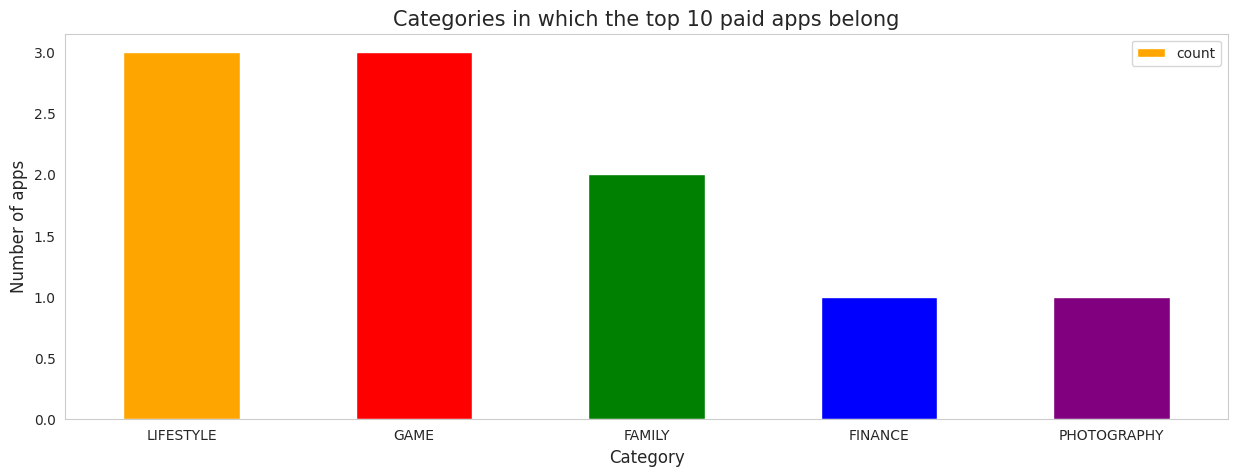

In [ ]:
# Categories in which the top 10 paid apps belong to
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color= ["orange", "red", "green", "blue", "purple"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()


##### 1. Why did you pick the specific chart?

The specific chart, a bar plot, is chosen to visualize the distribution of the top 10 paid apps across different app categories, providing a clear comparison of the number of apps in each category.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which app categories have the highest number of top 10 paid apps, indicating the popularity or revenue potential of apps in those categories. It helps to identify the categories where users are willing to pay more for app downloads.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help businesses understand the revenue potential in different app categories and focus their efforts on developing or promoting apps in categories with high revenue-generating potential. This targeted approach can lead to increased profitability and a positive impact on business growth.

#### Chart - 9 = Content Rating Distribution

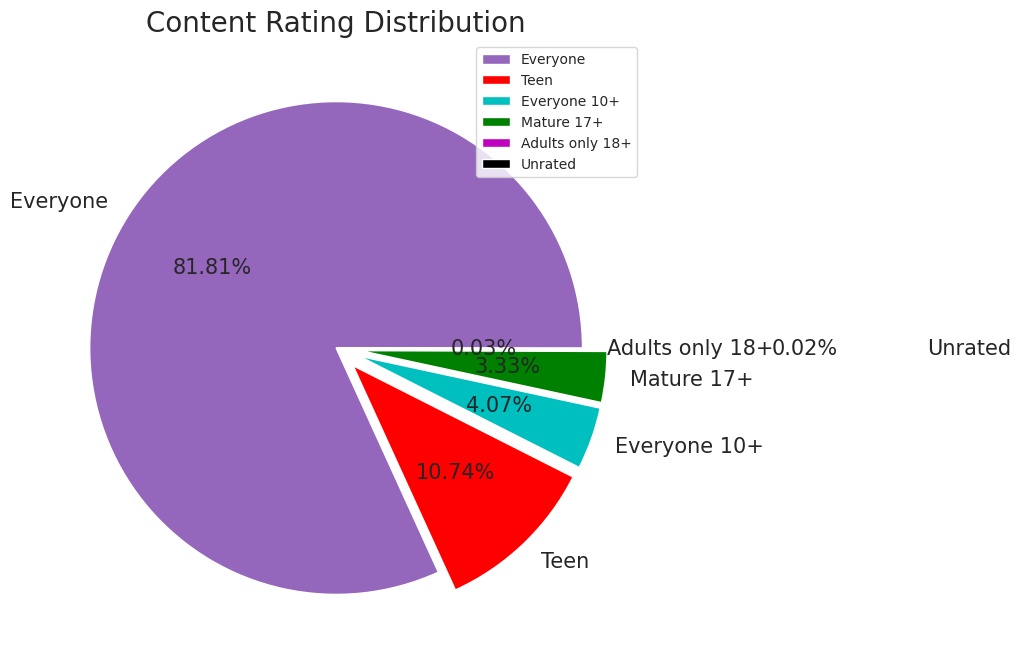

In [ ]:
# Calculate the distribution of app content ratings
data = data_df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+', 'Adults only 18+', 'Unrated']

# Create a pie chart for content ratings with adjusted settings
plt.figure(figsize=(8, 8))
explode = (0, 0.1, 0.1, 0.1, 0.0, 1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels=labels, colors=colors, autopct='%.2f%%', explode=explode, textprops={'fontsize': 15})
plt.title('Content Rating Distribution', size=20, loc='center')
plt.legend()

# Show the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

The pie chart effectively represents the distribution of categorical data, such as different content ratings, making it suitable for showcasing the proportions of each content rating category.

##### 2. What is/are the insight(s) found from the chart?

A majority of the apps (82%) in the play store are can be used by everyone. The remaining apps have various age restrictions to use it.
Teen Category has second highest percentage (10.7%)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can inform decision-making related to content creation, marketing strategies, and audience targeting based on content rating preferences, potentially leading to a positive impact on user engagement and app success.

#### Chart - 10 = Distribution of Apps by Rating, Size, and Type

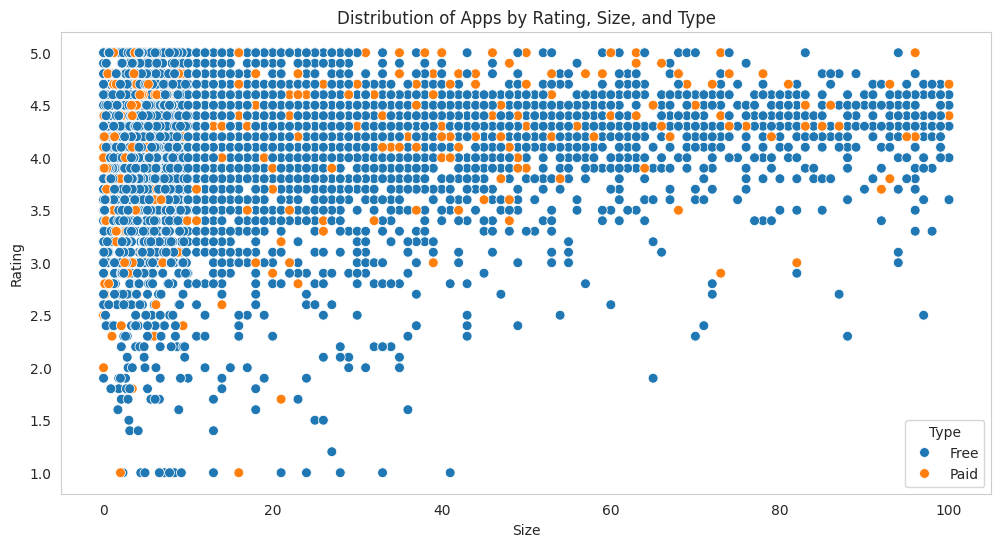

In [ ]:
# show the distribution of apps in terms of their rating, size, and type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size', y='Rating', hue='Type', data=data_df, s=50)
plt.title('Distribution of Apps by Rating, Size, and Type')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a scatter plot because it allows us to visualize the relationship between three variables: rating, size, and type of apps. The x-axis represents the size of the apps, the y-axis represents the rating, and the hue represents the type of apps (free or paid).

##### 2. What is/are the insight(s) found from the chart?

From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can indeed help in creating a positive business impact. Knowing that free apps with smaller sizes can have higher ratings suggests that developers may focus on creating compact, high-quality apps to attract more users.

#### Chart - 11 = Correlation Heatmap

data_df.corr() give the Value error - could not convert string to float: 'Facebook' :

which indicates that there is a column or value in dataFrame that contains non-numeric data, which cannot be processed in the correlation calculation because correlation is a measure of the linear relationship between numerical variables.


To resolve this issue, we exclude non-numeric columns or rows from the correlation calculation.

In [ ]:
# Exclude non-numeric columns from correlation calculation
numeric_data_df = data_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
print(numeric_data_df.corr())

            Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.050215  0.027373  0.034310 -0.018673
Reviews   0.050215  1.000000  0.037806  0.625158 -0.007604
Size      0.027373  0.037806  1.000000 -0.007578 -0.015097
Installs  0.034310  0.625158 -0.007578  1.000000 -0.009413
Price    -0.018673 -0.007604 -0.015097 -0.009413  1.000000


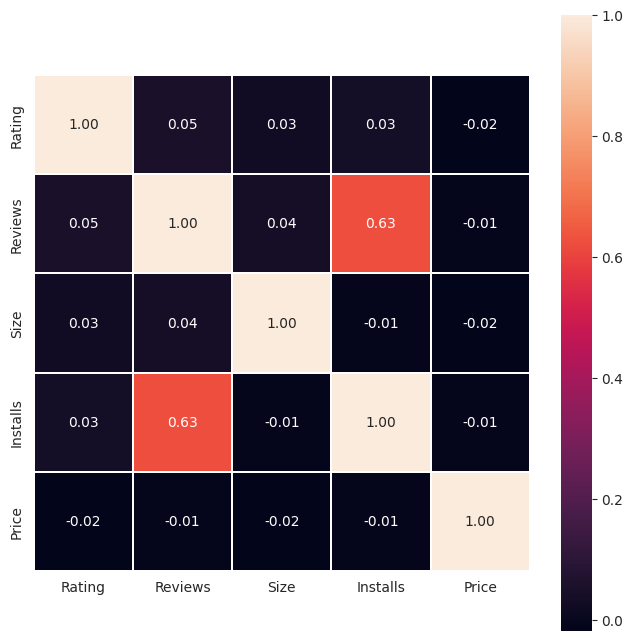

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(numeric_data_df.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a heatmap of the correlation matrix because it visually represents the correlation between numerical variables in a clear and concise manner. The color gradients help in quickly identifying the strength and direction of the relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

- There is a strong positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.

- The Price is slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.

- The Rating is slightly positively correlated with the Installs and Reviews column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

   Yes, the insights from the correlation matrix can guide business decisions. For instance, understanding the correlation between reviews and installs can help prioritize app features or marketing strategies that encourage positive reviews, leading to increased installations.
   
   The insight about pricing's weak correlation with ratings and reviews may indicate that pricing alone does not significantly impact user satisfaction, allowing businesses to focus on other factors for improving app performance and user experience.

#### Chart - 12 = Different Distributions in User Review Data

Charts for User Review Data

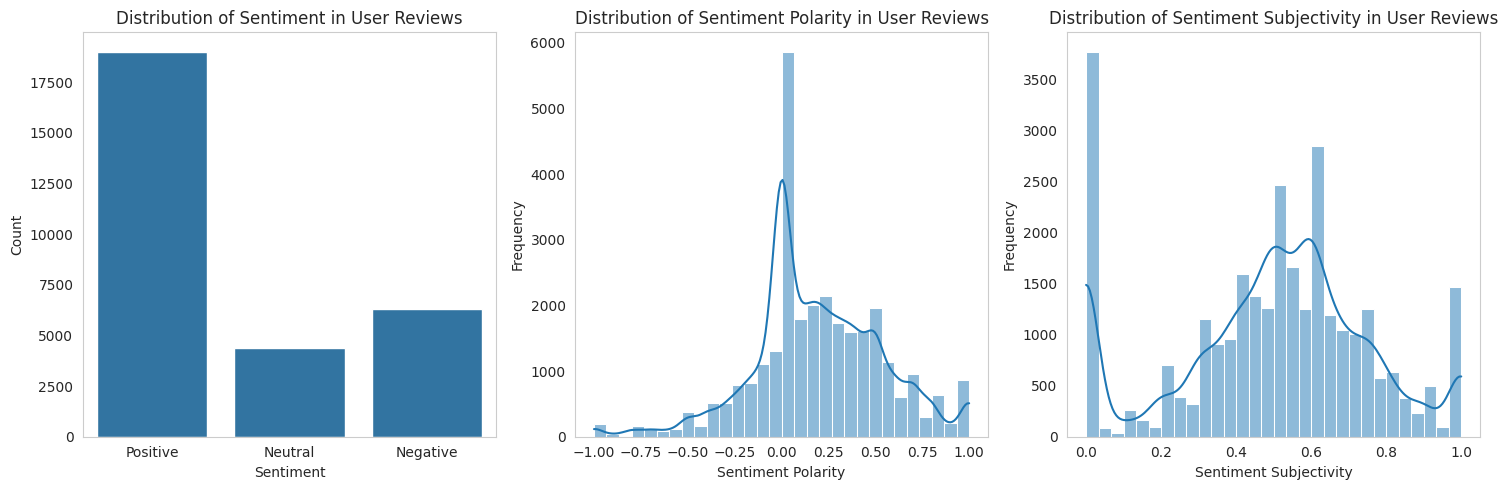

In [ ]:
# Plotting the three charts
plt.figure(figsize=(15, 5))

# Distribution of Sentiment in User Reviews
plt.subplot(1, 3, 1)
sns.countplot(x='Sentiment', data=reviews_df)
plt.title('Distribution of Sentiment in User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Distribution of Sentiment Polarity in User Reviews
plt.subplot(1, 3, 2)
sns.histplot(reviews_df['Sentiment_Polarity'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity in User Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Distribution of Sentiment Subjectivity in User Reviews
plt.subplot(1, 3, 3)
sns.histplot(reviews_df['Sentiment_Subjectivity'], bins=30, kde=True)
plt.title('Distribution of Sentiment Subjectivity in User Reviews')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

I chose to combine the countplot for sentiment distribution, and histograms for sentiment polarity and subjectivity to provide a comprehensive view of user sentiments in the reviews data. This combination allows us to understand both the distribution of sentiment categories and the detailed distribution of sentiment scores.

##### 2. What is/are the insight(s) found from the chart?

- The countplot shows that the majority of user reviews have a positive sentiment, followed by negative and neutral sentiments. This indicates that overall, users are more inclined to express positive opinions about the apps.
- The histogram of sentiment polarity reveals that the sentiment scores are concentrated around the range of -0.2 to 0.5, suggesting a mix of slightly negative to positive sentiments in the reviews.
- The histogram of sentiment subjectivity indicates that most reviews exhibit a moderate level of subjectivity, falling within the range of 0.4 to 0.6.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


These insights can help businesses understand the overall sentiment distribution in user reviews, identify trends in sentiment polarity and subjectivity, and make informed decisions regarding product improvements or marketing strategies based on customer feedback.

Analyzing sentiment polarity helps identify areas for improvement or strengths, while negative sentiments highlight potential issues needing attention.


#### Chart - 13 = Correlation between 2 datasets

Let's Join Main Dataset and User Review Dataset with 'App' column.

1. For this we drop the 'Translated_Review' column from the reviews dataframe, removing non-numeric data.And then map sentiment values to numeric values ('Positive' to 1, 'Neutral' to 0, 'Negative' to -1) in the 'Sentiment' column, facilitating quantitative analysis of sentiments.

In [ ]:
# Drop the 'Translated_Review' column from reviews_df
mod_reviews_df = reviews_df.drop('Translated_Review', axis=1)

# Map sentiment values to numeric values
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
mod_reviews_df['Sentiment'] = mod_reviews_df['Sentiment'].map(sentiment_mapping)

# Show the transformed reviews_df
print(mod_reviews_df.head())


                     App  Sentiment  Sentiment_Polarity  \
0  10 Best Foods for You          1                1.00   
1  10 Best Foods for You          1                0.25   
3  10 Best Foods for You          1                0.40   
4  10 Best Foods for You          1                1.00   
5  10 Best Foods for You          1                1.00   

   Sentiment_Subjectivity  
0                0.533333  
1                0.288462  
3                0.875000  
4                0.300000  
5                0.300000  


In [ ]:
merged_df = pd.merge(data_df, mod_reviews_df, on='App', how = "inner")
merged_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_group', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

The code calculates the mean of numeric columns in the modified reviews dataframe grouped by the 'App' column, creating a summary of average numeric values per app. It then merges this summary with the main data dataframe ('data_df') based on the app names, resulting in a combined dataframe that includes average numeric values from user reviews while dropping specified non-numeric columns for analysis.

In [ ]:
# Exclude non-numeric columns from correlation calculation
numeric_merged_df = merged_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
display(numeric_merged_df.corr())

Rating   Reviews      Size  Installs     Price  \
Rating                  1.000000  0.042358  0.058394  0.026489 -0.013222   
Reviews                 0.042358  1.000000  0.083745  0.628467 -0.015329   
Size                    0.058394  0.083745  1.000000 -0.034124  0.011604   
Installs                0.026489  0.628467 -0.034124  1.000000 -0.020184   
Price                  -0.013222 -0.015329  0.011604 -0.020184  1.000000   
Sentiment               0.108087 -0.060425 -0.075725 -0.041354  0.020350   
Sentiment_Polarity      0.111607 -0.068866 -0.100845 -0.052880  0.021172   
Sentiment_Subjectivity  0.075345 -0.004953  0.015401 -0.004725 -0.000417   

                        Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
Rating                   0.108087            0.111607                0.075345  
Reviews                 -0.060425           -0.068866               -0.004953  
Size                    -0.075725           -0.100845                0.015401  
Installs                -0.041354           -0.052880               -0.004725  
Price                    0.020350            0.021172               -0.000417  
Sentiment                1.000000            0.755882                0.186580  
Sentiment_Polarity       0.755882            1.000000                0.271602  
Sentiment_Subjectivity   0.186580            0.271602                1.000000

Text(0.5, 1.0, ' Heatmap for merged Dataframe')

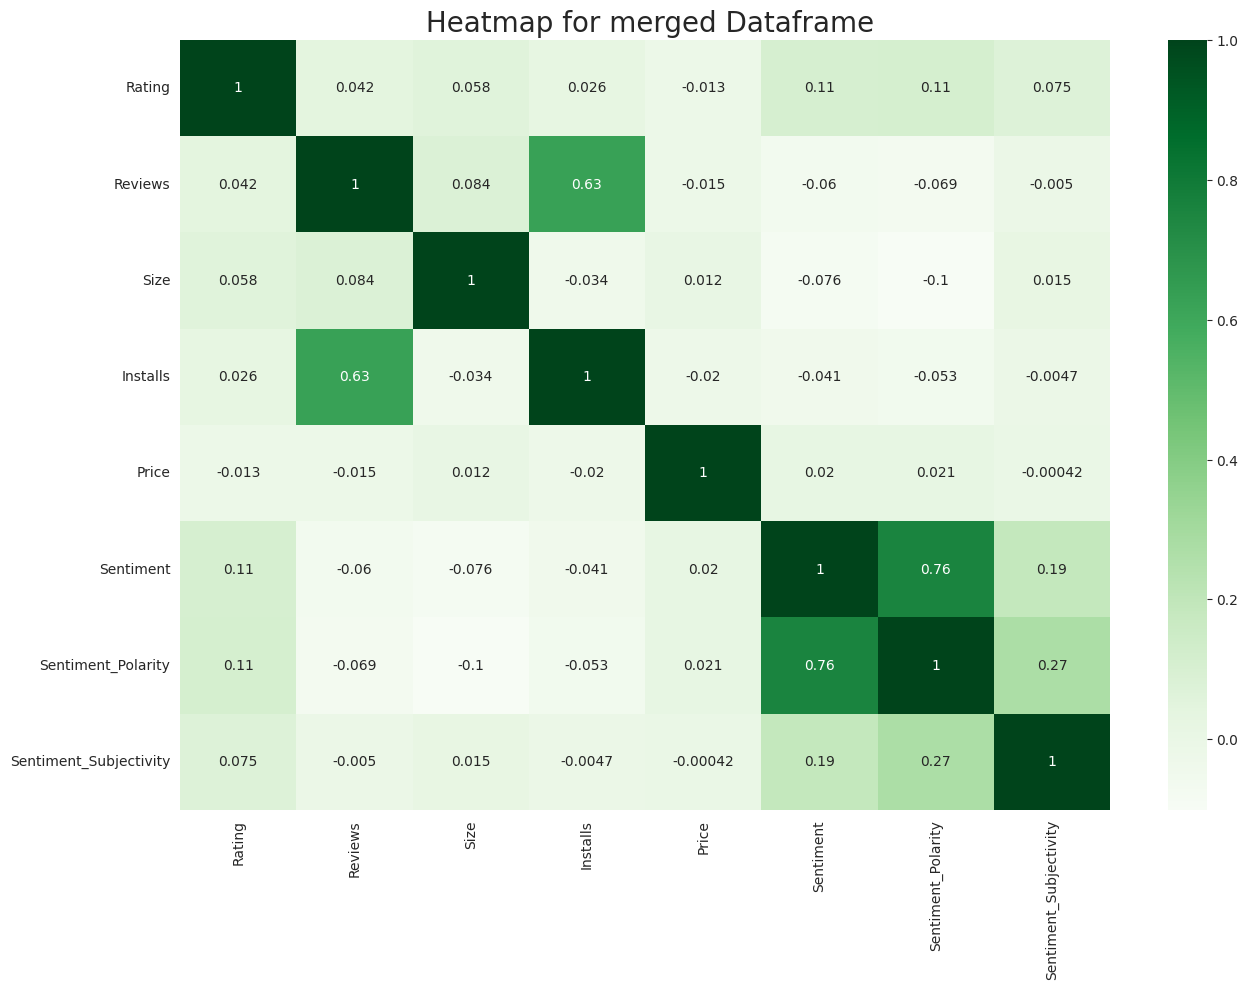

In [ ]:
# Correlation heatmap
# Heat Map for the merged data frame
plt.figure(figsize = (15,10))
sns.heatmap(numeric_merged_df.corr(), annot= True, cmap='Greens')
plt.title(' Heatmap for merged Dataframe', size=20)

##### 1. Why did you pick the specific chart?

The correlation matrix between merged Play Store data and user reviews data shows the relationships between various numeric columns.

##### 2. What is/are the insight(s) found from the chart?

'Sentiment_Polarity', and 'Sentiment_Subjectivity' have moderate positive correlations with 'Rating', indicating some level of influence of sentiment analysis on app ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Understanding the correlation between sentiment metrics and app ratings can help prioritize features or improvements that positively impact user sentiments, leading to higher app ratings and user satisfaction.

#### Chart - 14 = Percentage of Review Sentiments

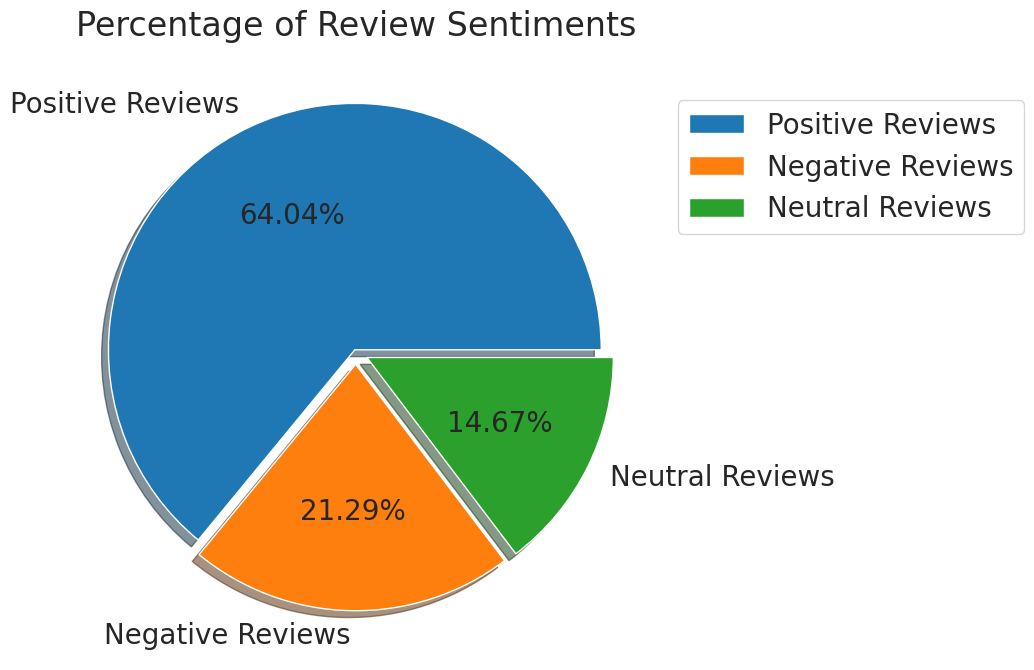

In [ ]:
import matplotlib.pyplot as plt

# Get the count of each sentiment category
counts = list(reviews_df['Sentiment'].value_counts())

# Define labels for the pie chart
labels = 'Positive Reviews', 'Negative Reviews', 'Neutral Reviews'

# Create the pie chart with exploded segments, shadow, and percentage labels
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")

# Set the title and turn off axis labels
plt.title('Percentage of Review Sentiments')
plt.axis('off')

# Add a legend outside the plot area to the right
plt.legend(bbox_to_anchor=(1, 0.8), loc='center left')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is suitable for displaying the distribution of categories (positive, negative, neutral) in a visually intuitive way, making it easy to grasp the proportions of each sentiment category.

##### 2. What is/are the insight(s) found from the chart?

From this visualization, it's evident that a significant majority of reviews are positive, indicating a generally favorable sentiment towards the apps.

Theres tie between negative and neutral reviews which are 21% and 14.6% respectively

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization helps in understanding the overall sentiment polarity of the reviews. The higher percentage of positive reviews suggests that users are generally satisfied with the apps, while the presence of negative and neutral reviews indicates areas where improvements or attention might be needed

**Apps with the highest number of positive reviews**

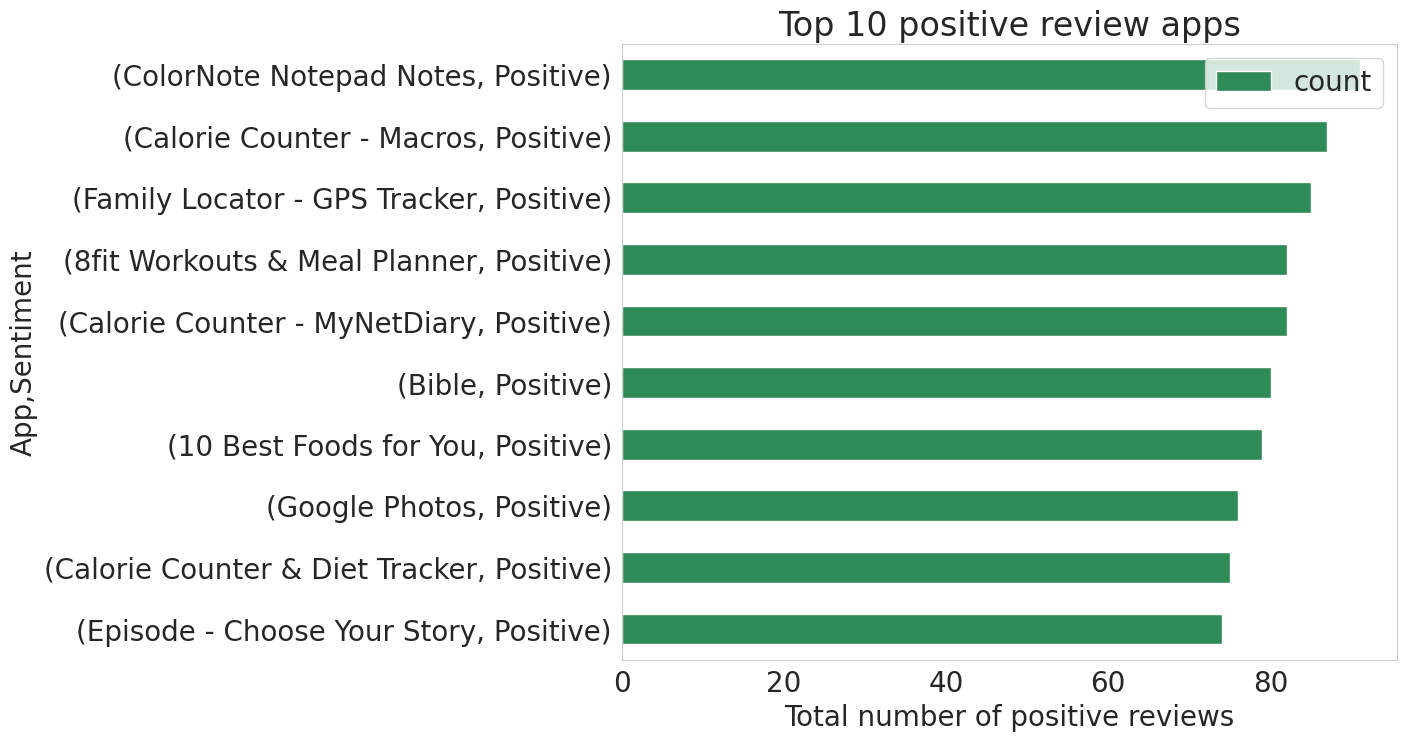

In [ ]:
# positive reviews
positive_rev_df=reviews_df[reviews_df['Sentiment']=='Positive']
positive_rev_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='seagreen').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

**Apps with the highest number of negative reviews**

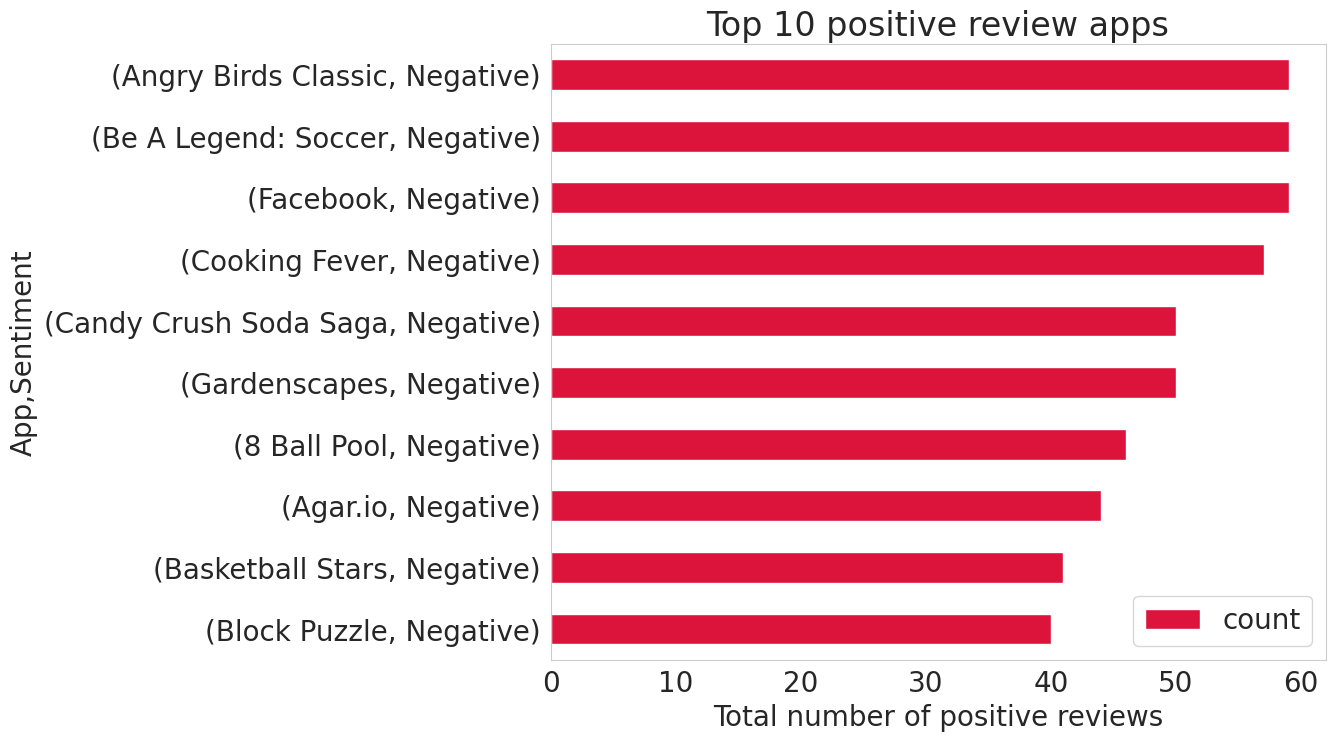

In [ ]:
# negative reviews
negative_rev_df=reviews_df[reviews_df['Sentiment']=='Negative']
negative_rev_df.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='crimson').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

#### Chart - 15 = Distribution of Subjectivity

In [ ]:
# Calculate the count of each sentiment subjectivity category
subjectivity_counts = merged_df['Sentiment_Subjectivity'].value_counts()


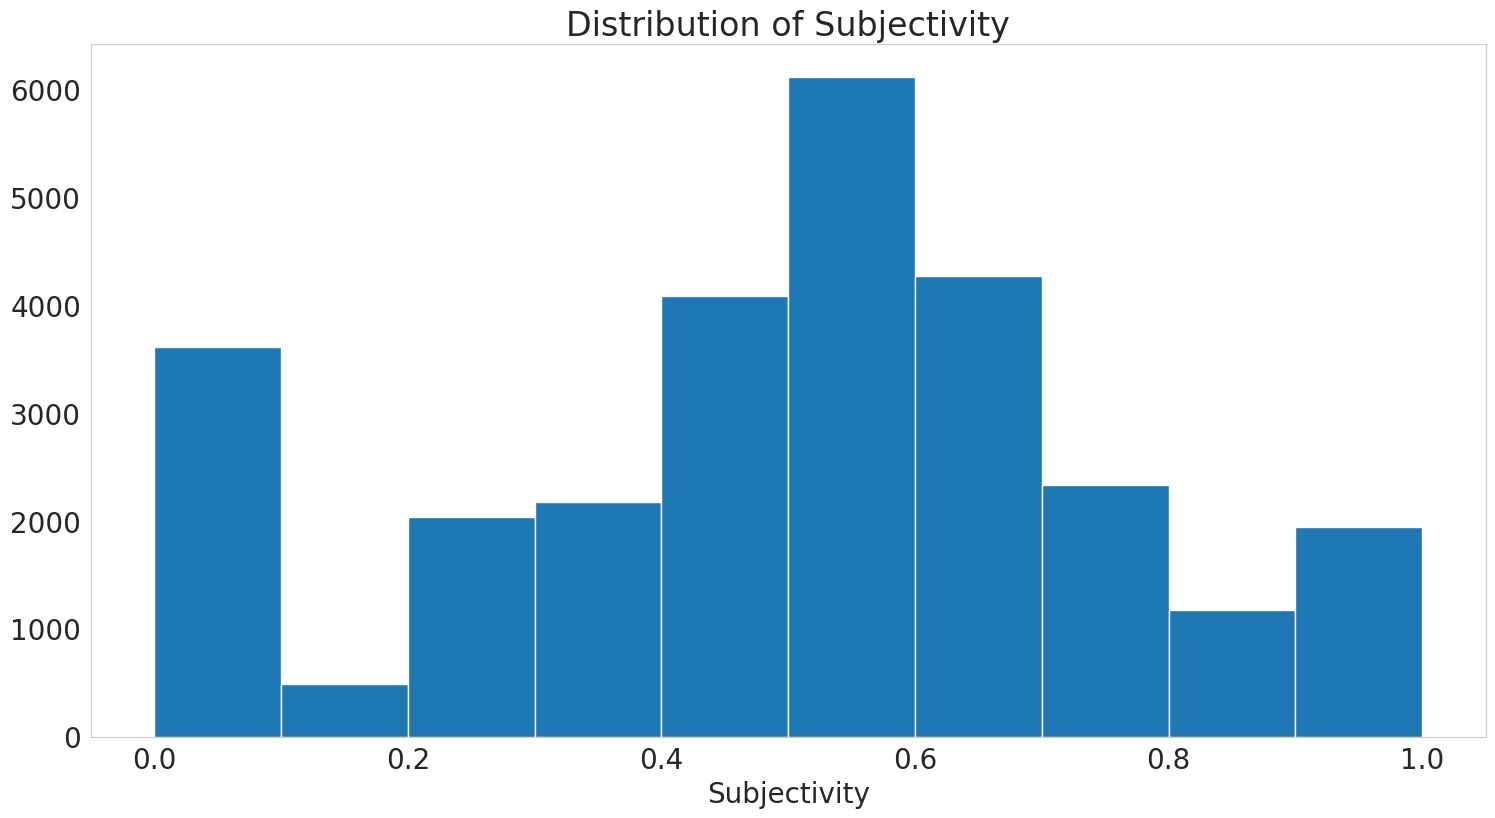

In [ ]:
# Plotting the histogram for sentiment subjectivity distribution
plt.figure(figsize=(18, 9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

##### 1. Why did you pick the specific chart?

The histogram is chosen to visualize the distribution of sentiment subjectivity because it provides a clear representation of the frequency of different subjectivity levels.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that most users tend to express subjective opinions (0.4 to 0.7) rather than objective facts or highly subjective opinions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization helps in understanding the distribution of user sentiments based on their subjective experiences, which can be valuable for businesses to gauge user satisfaction and make improvements accordingly.

#### Chart -  16 = Is sentiment_subjectivity proportional to sentiment_polarity?

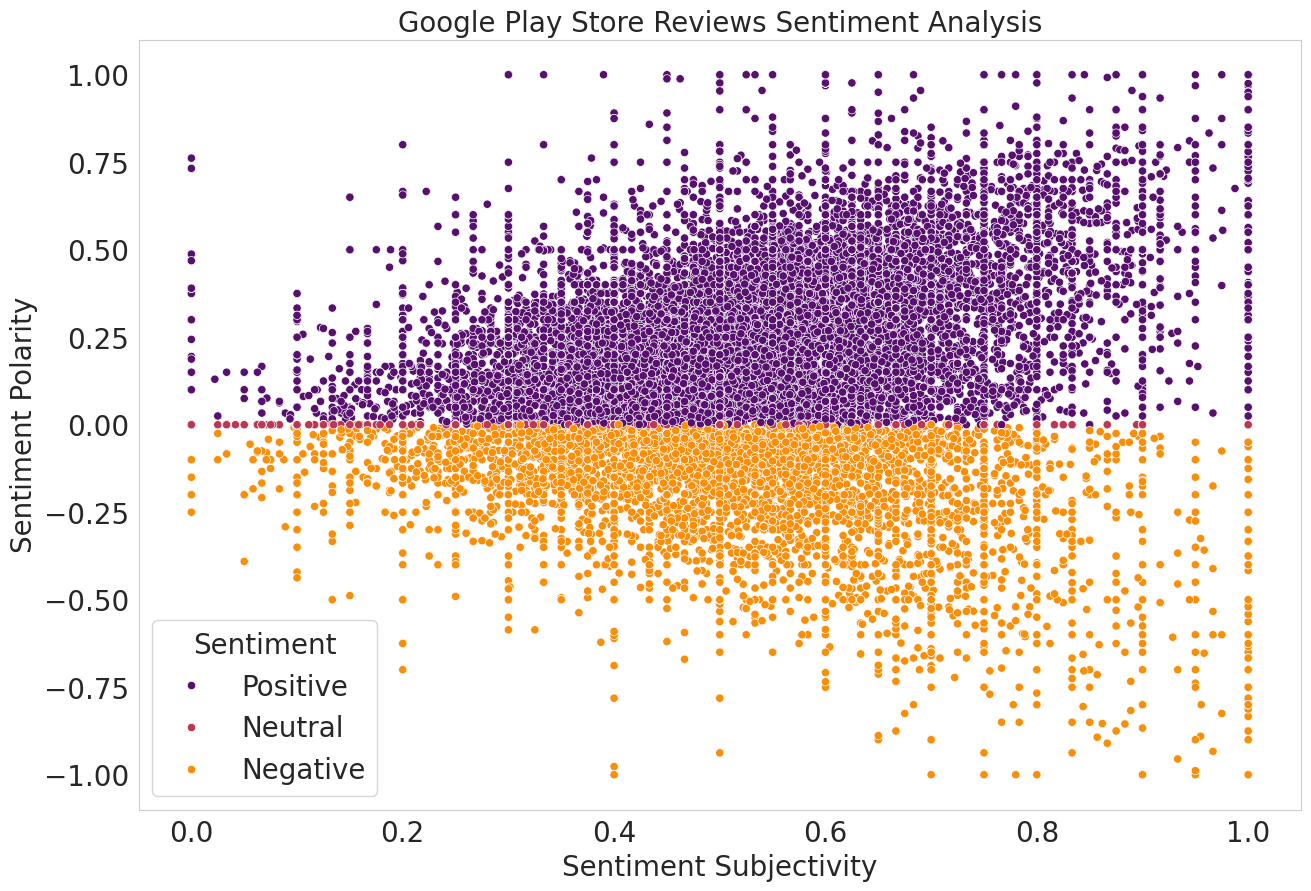

In [ ]:

# Create a scatter plot for sentiment analysis
plt.figure(figsize=(15, 10))
sns.scatterplot(x = reviews_df['Sentiment_Subjectivity'],y =  reviews_df['Sentiment_Polarity'],
                hue=reviews_df['Sentiment'], edgecolor='white', palette='inferno')
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.xlabel("Sentiment Subjectivity")
plt.ylabel("Sentiment Polarity")
plt.legend(title="Sentiment")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is suitable for showing the relationship between two numerical variables, such as sentiment subjectivity and sentiment polarity, and allows us to observe patterns or correlations.



##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows that while sentiment subjectivity and sentiment polarity generally have a proportional relationship in many cases, there are instances where this relationship is not strictly proportional, indicating varied sentiments within reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It provides a visual representation of how sentiment subjectivity and polarity are distributed across reviews, helping to identify trends or anomalies in sentiment analysis and understand the overall sentiment patterns in the data.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### Enhanced Business Solution for App Performance and User Satisfaction

1. **Category Optimization for Maximum Impact**
   - Focus resources and marketing efforts on top-performing categories like Communication and Social, which exhibit high user engagement, positive sentiment, and significant installs.
   - Tailor app features, updates, and promotional campaigns to resonate with user preferences within these dominant categories, ensuring maximum impact and user satisfaction.

2. **Review and Ratings Enhancement**
   - Develop targeted strategies to boost app ratings, leveraging the observed positive correlation (0.6) between ratings and installs.
   - Implement in-app prompts and incentives for satisfied users to leave reviews, while promptly addressing negative feedback to demonstrate responsiveness and commitment to user satisfaction.

3. **Pricing Strategy Refinement**
   - Optimize pricing strategies based on the slight negative correlation (-0.09) between app prices and ratings/reviews.
   - Conduct A/B testing and introduce flexible pricing tiers or promotional offers to attract price-sensitive users without compromising perceived value, thereby enhancing user acquisition and retention.

4. **Sentiment-Driven Feature Enhancements**
   - Prioritize feature enhancements based on sentiment analysis insights to address user satisfaction and pain points effectively.
   - Capitalize on positive sentiment themes to strengthen app features that resonate with users, while addressing negative sentiments to improve overall user experience and mitigate churn.

5. **Marketing Messaging Alignment**
   - Align marketing messaging with sentiment trends to reinforce positive perceptions and attract new users.
   - Ensure consistency between marketing campaigns and user sentiments, maintaining authenticity and trust to drive user engagement and loyalty.

6. **Continuous Monitoring and Agile Iterations**
   - Implement a robust feedback loop and agile development approach to continuously monitor user feedback, sentiment trends, and app performance metrics.
   - Iterate and adapt app features, marketing strategies, and pricing models based on real-time insights, ensuring ongoing improvement, relevance, and competitiveness in the Google Play Store ecosystem.

By implementing these targeted strategies informed by data-driven insights from the combined analysis, the client can optimize app performance, enhance user satisfaction, and drive sustainable business growth and competitive advantage in the dynamic and competitive Google Play Store environment.

# **Conclusion**

In conclusion, the analysis underscores the importance of understanding user preferences, focusing on app quality, and aligning with market trends to succeed in the competitive landscape of the Google Play Store. By leveraging these insights, developers and businesses can make informed decisions to optimize app performance, enhance user satisfaction, and drive sustainable growth in the Android app market.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***